In [1]:
import os
import re

def remove_spaces_and_make_single_line(input_file, output_directory):
    with open(input_file, 'r') as file:
        content = file.read()

    # Remove spaces from the content
    content = content.replace(' ', '')

    # Convert content to a single line
    content = content.replace('\n', '')

    # Remove all letters except A, T, G, C, and U
    content = re.sub('[^ATGCU]', '', content)

    # Generate output file path in the same directory
    output_file = os.path.join(output_directory, os.path.basename(input_file))

    with open(output_file, 'w') as file:
        file.write(content)

    print("Spaces removed, content made single line, and letters removed. Saved to", output_file)


def process_files_in_directory(input_directory, output_directory):
    # Iterate through all files in the input directory
    for filename in os.listdir(input_directory):
        # Check if the current item is a file
        if os.path.isfile(os.path.join(input_directory, filename)):
            # Generate input file path
            input_file = os.path.join(input_directory, filename)

            # Process the file
            remove_spaces_and_make_single_line(input_file, output_directory)

# Usage example
input_directory = 'C:\\bio\\content'  # Replace with your input directory path
output_directory = 'C:\\bio\\good'  # Replace with your output directory path

process_files_in_directory(input_directory, output_directory)

Spaces removed, content made single line, and letters removed. Saved to C:\bio\good\chicken.txt
Spaces removed, content made single line, and letters removed. Saved to C:\bio\good\chimpanzee.txt
Spaces removed, content made single line, and letters removed. Saved to C:\bio\good\coelacant.txt
Spaces removed, content made single line, and letters removed. Saved to C:\bio\good\Dasypodidae.txt
Spaces removed, content made single line, and letters removed. Saved to C:\bio\good\Elephantidae.txt
Spaces removed, content made single line, and letters removed. Saved to C:\bio\good\elephant_shark.txt
Spaces removed, content made single line, and letters removed. Saved to C:\bio\good\freshwater_pufferfish.txt
Spaces removed, content made single line, and letters removed. Saved to C:\bio\good\human.txt
Spaces removed, content made single line, and letters removed. Saved to C:\bio\good\Lacertilia.txt
Spaces removed, content made single line, and letters removed. Saved to C:\bio\good\lungfish.txt
Spa

In [2]:
# GLOBAL ALIGNMENT
print("GLOBAL ALIGNMENT")
import os
from itertools import combinations

def read_sequence(file_path):
    with open(file_path, 'r') as file:
        sequence = file.read().strip()
        return sequence

def compare_sequences_in_directory(directory_path):
    # Get the list of files in the directory
    file_list = os.listdir(directory_path)

    # Generate combinations of file pairs
    file_pairs = combinations(file_list, 2)

    # Iterate through the file pairs
    for file1, file2 in file_pairs:
        file1_path = os.path.join(directory_path, file1)
        file2_path = os.path.join(directory_path, file2)

        # Read sequences from files
        sequence1 = read_sequence(file1_path)
        sequence2 = read_sequence(file2_path)

        # Define the scoring scheme
        match_score = 1
        mismatch_score = -1
        gap_penalty = -2

        # Initialize the scoring matrix
        rows = len(sequence1) + 1
        cols = len(sequence2) + 1
        score_matrix = [[0] * cols for _ in range(rows)]

        # Fill the scoring matrix
        for i in range(1, rows):
            for j in range(1, cols):
                match = score_matrix[i - 1][j - 1] + (match_score if sequence1[i - 1] == sequence2[j - 1] else mismatch_score)
                delete = score_matrix[i - 1][j] + gap_penalty
                insert = score_matrix[i][j - 1] + gap_penalty
                score_matrix[i][j] = max(match, delete, insert)

        # Retrieve the alignment score
        alignment_score = score_matrix[-1][-1]

        # Traceback to find the alignment
        alignment1 = ""
        alignment2 = ""
        i, j = len(sequence1), len(sequence2)
        while i > 0 and j > 0:
            if sequence1[i - 1] == sequence2[j - 1]:
                alignment1 = sequence1[i - 1] + alignment1
                alignment2 = sequence2[j - 1] + alignment2
                i -= 1
                j -= 1
            elif score_matrix[i][j] == score_matrix[i - 1][j - 1] + mismatch_score:
                alignment1 = sequence1[i - 1] + alignment1
                alignment2 = sequence2[j - 1] + alignment2
                i -= 1
                j -= 1
            elif score_matrix[i][j] == score_matrix[i - 1][j] + gap_penalty:
                alignment1 = sequence1[i - 1] + alignment1
                alignment2 = '-' + alignment2
                i -= 1
            else:
                alignment1 = '-' + alignment1
                alignment2 = sequence2[j - 1] + alignment2
                j -= 1

        # Handle remaining characters if any
        while i > 0:
            alignment1 = sequence1[i - 1] + alignment1
            alignment2 = '-' + alignment2
            i -= 1

        while j > 0:
            alignment1 = '-' + alignment1
            alignment2 = sequence2[j - 1] + alignment2
            j -= 1

        # Print the files being compared
        print("Comparing", file1, "and", file2)

        # Print the alignment and score
        print("Alignment Score:", alignment_score)
        print("Alignment:")
        print(alignment1)
        print(alignment2)
        print()

# Usage example
directory_path = 'good\\'  # Replace with the actual directory path
compare_sequences_in_directory(directory_path)


GLOBAL ALIGNMENT
Comparing chicken.txt and chimpanzee.txt
Alignment Score: -597
Alignment:
AGGGGCAGGCTGCGGGCGGCGAGCGGCCGGGGCCGGGCTGGACCGGGTCCCCCTCTCCTGAAGTCTGTGTGCGTGTGCCCGCGGGGCGGGCGGGCGGCAGCGGCGGTGGTCGCTTTCAGCGCGAGGCGCCGAGTGGAGCCGAGCCGAGGTGAGCGGTGGGAGCGGGGCGGAGGGGCAGCCTGGGAGCACCCCGCCGAGTGATGCGGCGGGTGGTACGCCCGGCTCCTGTCCCCAAGCAGCTGAGGACCGGTGCGTGCGCTTTCGCTCCTGGCGAAGCAGGAAATAAGCGCTCGGAATCAGCCCCGAGCACACAGTCCGGAGCAAGCGCTCCTGCGTGGAACTGGAAGCAAGTTTCTGCGCGCCCCGCGCTGACGGGAACCGGGCGGGAAGGGGCACCGCGGGGAGCGTCTCCCCGGGCTTTTTCTGACACAAGTACGAAGGTTTTCTGGTGTGCGTGTGCGTGTGTGTACATATATATTTGATCATTTGATACGCCAGTTGACTGGGGGAGCTCACAGCAGGTATAACGAAGAAATCCAACAGTGCTTGTTCAACTGATGCCAAACCGCTGCACAGACCTGCTCTCTCTCTCAAAGTAGAAACGTAAGAGGGTTCCATGCCCCACCCGGCGGGTCGGTGCCTGTGGCGGCTCCCTGAGGACTGCGTGTCTGTAGGTCGCTGACCATCAGGCGCTGTGAAGGCAGGTCCACCGGCTTGTGGCCTGGCGCTAGCTGGGCTCTGGCTGCACAGGCAGCTCCCGCAGGTAGCCCAGCTGCCCCAGTTGCCCACAGTCGGCCCCCAGCCAGGCCCAAAGCCGCTGGATCTGCCGTGGCACAGATGTCAGCACGCCACATATGAGTGAGGGCTGCACGCCTACAGAAAGCATATGTACGAAGAACGCTGCTTTTG

In [3]:
# LOCAL ALIGNMENT
print("LOCAL ALIGNMENT")
import os
from itertools import combinations

def read_sequence(file_path):
    with open(file_path, 'r') as file:
        sequence = file.read().strip()
        return sequence

def compare_sequences_in_directory(directory_path):
    # Get the list of files in the directory
    file_list = os.listdir(directory_path)

    # Generate combinations of file pairs
    file_pairs = combinations(file_list, 2)

    # Iterate through the file pairs
    for file1, file2 in file_pairs:
        file1_path = os.path.join(directory_path, file1)
        file2_path = os.path.join(directory_path, file2)

        # Read sequences from files
        sequence1 = read_sequence(file1_path)
        sequence2 = read_sequence(file2_path)

        # Define the scoring scheme
        match_score = 2
        mismatch_score = -1
        gap_penalty = -2

        # Initialize the scoring matrix
        rows = len(sequence1) + 1
        cols = len(sequence2) + 1
        score_matrix = [[0] * cols for _ in range(rows)]

        # Fill the scoring matrix
        max_score = 0
        max_i = 0
        max_j = 0

        for i in range(1, rows):
            for j in range(1, cols):
                match = score_matrix[i - 1][j - 1] + (match_score if sequence1[i - 1] == sequence2[j - 1] else mismatch_score)
                delete = score_matrix[i - 1][j] + gap_penalty
                insert = score_matrix[i][j - 1] + gap_penalty
                score_matrix[i][j] = max(0, match, delete, insert)

                if score_matrix[i][j] > max_score:
                    max_score = score_matrix[i][j]
                    max_i = i
                    max_j = j

        # Traceback to find the alignment
        alignment1 = ""
        alignment2 = ""
        i = max_i
        j = max_j

        while i > 0 and j > 0 and score_matrix[i][j] > 0:
            if score_matrix[i][j] == score_matrix[i - 1][j - 1] + (match_score if sequence1[i - 1] == sequence2[j - 1] else mismatch_score):
                alignment1 = sequence1[i - 1] + alignment1
                alignment2 = sequence2[j - 1] + alignment2
                i -= 1
                j -= 1
            elif score_matrix[i][j] == score_matrix[i - 1][j] + gap_penalty:
                alignment1 = sequence1[i - 1] + alignment1
                alignment2 = "-" + alignment2
                i -= 1
            else:
                alignment1 = "-" + alignment1
                alignment2 = sequence2[j - 1] + alignment2
                j -= 1

        # Print the files being compared
        print("Comparing", file1, "and", file2)

        # Print the alignment and score
        alignment_score = max_score
        print("Alignment Score:", alignment_score)
        print("Alignment:")
        print(alignment1)
        print(alignment2)
        print()

# Usage example
directory_path = 'good\\'  # Replace with the actual directory path
compare_sequences_in_directory(directory_path)


LOCAL ALIGNMENT
Comparing chicken.txt and chimpanzee.txt
Alignment Score: 1463
Alignment:
AGAAGGATGGTAGAA-GA-GTGATACCTGCTGCTTCGGT-AG-A--TCAGAC-AGGGC-TGTTGCT--CCTCTTGCCCAGCTCTGTATGGATCGAGACTGGAGAAACAAAGCAAGTCCATGTAATGCA-GTTGTCACATGTGCG-T-CT--ATGT-ATGCTCATGTACCTAAATCTCAAAGG-GATGACAAAAATCA-GCAAATGG-CCTCAGTTTGGTCCTTAGCTGCCAAGAAGA-CC-A-ATAC-A-AAGCT-TTGTTTTGA-A--A-CT--A-AGGGAGCCATATCTCA-AGCA--CCTTCAGGAG-AG-CAGTCCCA--T-CGGAGCGCCT--T---TG-CCCCAGTG-CTTCCAGTTCTGCCCAAC----ATGCAATGAACACCCTCTTTGTTAGCGATCCCATACATGACTATGGAGATGAATTGGTGGGTGAAGGCAGCAGCACAGGCTGCAGCTGAATCCTCGGCAGCAGGACCCAGCCACTGCAGCGGTTTCTTTTTTAGCCTGT---GGGAGGAAG-GTATTATCACAACAGGTGTGAGGTGGCATATGTTGT-GCTTTGGGCTTTTGTCATGGTA-TTGTA---TGGTTTGTTTACATGTCTGATTTCTGTAGTGCATCGA-CTTATTATAGGTCTCTTTCACAA-CTCAGTTTTCATCTCTTACAGATATAGACATTTCCATTGTGTGGCCTTGTGAATG-TGAAACTAGCATCTATTCTAGAAATGAAAAAAAAAAAAAAGAGAGTAAGAAAATACCTTTTTTTAGAGAATTTTTCACAGTGCATGGTTGTGAAGTCTAAGAATAGTTGGTGTAAACACGCAATAGACACTTGAGGTTTTATTG-CAGTTTTTAAAT--ACATTCCATCC-AT-AGTGTTTGTTTTAGTAAAGGCT

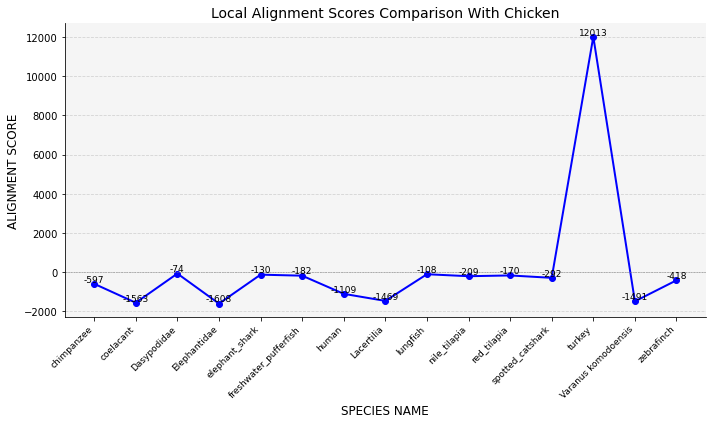

In [4]:
import matplotlib.pyplot as plt

organisms = ['chimpanzee', 'coelacant', 'Dasypodidae', 'Elephantidae', 'elephant_shark', 'freshwater_pufferfish', 'human', 'Lacertilia', 'lungfish', 'nile_tilapia', 'red_tilapia', 'spotted_catshark', 'turkey', 'Varanus komodoensis', 'zebrafinch']
alignment_scores = [-597, -1563, -74, -1608, -130, -182, -1109, -1469, -108, -209, -170, -292, 12013, -1491, -418]

plt.figure(figsize=(10, 6))  # Adjust the figure size for better readability

plt.plot(organisms, alignment_scores, marker='o', linestyle='-', color='b', linewidth=2)

plt.xlabel("SPECIES NAME", fontsize=12)
plt.ylabel("ALIGNMENT SCORE", fontsize=12)
plt.title("Local Alignment Scores Comparison With Chicken", fontsize=14)

plt.xticks(rotation=45, ha='right', fontsize=9)  # Rotate the x-axis labels for readability
plt.yticks(fontsize=10)

plt.grid(axis='y', linestyle='--', alpha=0.5)  # Adjust the grid

plt.gca().set_facecolor('#f5f5f5')  # Adding a background color to the plot

# Adding data labels
for x, y in zip(organisms, alignment_scores):
    plt.text(x, y, str(y), ha='center', va='bottom', color='black', fontsize=9)

# Adding a subtle horizontal line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Removing top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()



In [8]:
def extract_chicken_comparisons(file_path):
    keyword = "Comparing chicken.txt"
    chicken_comparisons = []

    with open(file_path, "r") as file:
        lines = file.readlines()
        for i in range(len(lines)):
            if keyword in lines[i]:
                chicken_comparison = lines[i].strip() + " " + lines[i+1].strip()
                chicken_comparisons.append(chicken_comparison)

    return chicken_comparisons

file_path = "C:\\Users\\bnand\\Desktop\\LOCAL ALIGNMENT.txt"
chicken_comparisons = extract_chicken_comparisons(file_path)

# Print the extracted comparisons with chicken.txt and the alignment score
for comparison in chicken_comparisons:
    print(comparison)


Comparing chicken.txt and chimpanzee.txt Alignment Score: 1463
Comparing chicken.txt and coelacant.txt Alignment Score: 5353
Comparing chicken.txt and Dasypodidae.txt Alignment Score: 271
Comparing chicken.txt and Elephantidae.txt Alignment Score: 5064
Comparing chicken.txt and elephant_shark.txt Alignment Score: 486
Comparing chicken.txt and freshwater_pufferfish.txt Alignment Score: 515
Comparing chicken.txt and human.txt Alignment Score: 2778
Comparing chicken.txt and Lacertilia.txt Alignment Score: 5345
Comparing chicken.txt and lungfish.txt Alignment Score: 341
Comparing chicken.txt and nile_tilapia.txt Alignment Score: 753
Comparing chicken.txt and red_tilapia.txt Alignment Score: 422
Comparing chicken.txt and spotted_catshark.txt Alignment Score: 832
Comparing chicken.txt and turkey.txt Alignment Score: 24026
Comparing chicken.txt and Varanus komodoensis.txt Alignment Score: 5460
Comparing chicken.txt and zebrafinch.txt Alignment Score: 1383
Comparing chicken.txt and zebrafish.t

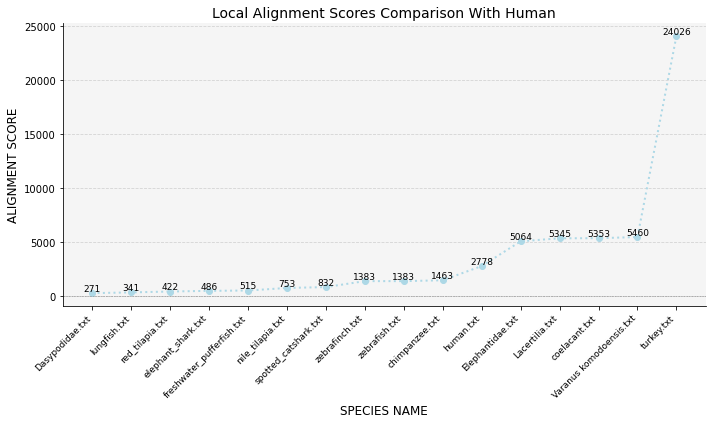

In [12]:
import matplotlib.pyplot as plt

alignment_scores = {
    "chimpanzee.txt": 1463, "coelacant.txt": 5353, "Dasypodidae.txt": 271,
    "Elephantidae.txt": 5064, "elephant_shark.txt": 486, "freshwater_pufferfish.txt": 515,
    "human.txt": 2778, "Lacertilia.txt": 5345, "lungfish.txt": 341,
    "nile_tilapia.txt": 753, "red_tilapia.txt": 422, "spotted_catshark.txt": 832,
    "turkey.txt": 24026, "Varanus komodoensis.txt": 5460, "zebrafinch.txt": 1383, "zebrafish.txt": 1383
}

sorted_scores = sorted(alignment_scores.items(), key=lambda x: x[1])

files = [item[0] for item in sorted_scores]
alignment_values = [item[1] for item in sorted_scores]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(files, alignment_values, marker='o', linestyle=':', color='lightblue', linewidth=2)

# Customizing the plot
plt.xlabel("SPECIES NAME", fontsize=12)
plt.ylabel("ALIGNMENT SCORE", fontsize=12)
plt.title("Local Alignment Scores Comparison With Human", fontsize=14)

# Tilt x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right', fontsize=9)

# Adjusting the grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding a background color to the plot
plt.gca().set_facecolor('#f5f5f5')

# Adding data labels
for x, y in zip(files, alignment_values):
    plt.text(x, y, str(y), ha='center', va='bottom', color='black', fontsize=9)

# Adding a subtle horizontal line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Removing top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adding padding to the bottom to accommodate x-axis labels
plt.gcf().subplots_adjust(bottom=0.2)

plt.tight_layout()

plt.show()



In [13]:
def extract_chicken_comparisons(file_path):
    keyword = "Comparing Dasypodidae.txt"
    chicken_comparisons = []

    with open(file_path, "r") as file:
        lines = file.readlines()
        for i in range(len(lines)):
            if keyword in lines[i]:
                chicken_comparison = lines[i].strip() + " " + lines[i+1].strip()
                chicken_comparisons.append(chicken_comparison)

    return chicken_comparisons

file_path = "C:\\Users\\bnand\\Desktop\\LOCAL ALIGNMENT.txt"
chicken_comparisons = extract_chicken_comparisons(file_path)

# Print the extracted comparisons with chicken.txt and the alignment score
for comparison in chicken_comparisons:
    print(comparison)


Comparing Dasypodidae.txt and Elephantidae.txt Alignment Score: 245
Comparing Dasypodidae.txt and elephant_shark.txt Alignment Score: 237
Comparing Dasypodidae.txt and freshwater_pufferfish.txt Alignment Score: 180
Comparing Dasypodidae.txt and human.txt Alignment Score: 223
Comparing Dasypodidae.txt and Lacertilia.txt Alignment Score: 278
Comparing Dasypodidae.txt and lungfish.txt Alignment Score: 180
Comparing Dasypodidae.txt and nile_tilapia.txt Alignment Score: 262
Comparing Dasypodidae.txt and red_tilapia.txt Alignment Score: 167
Comparing Dasypodidae.txt and spotted_catshark.txt Alignment Score: 240
Comparing Dasypodidae.txt and turkey.txt Alignment Score: 271
Comparing Dasypodidae.txt and Varanus komodoensis.txt Alignment Score: 273
Comparing Dasypodidae.txt and zebrafinch.txt Alignment Score: 275
Comparing Dasypodidae.txt and zebrafish.txt Alignment Score: 275


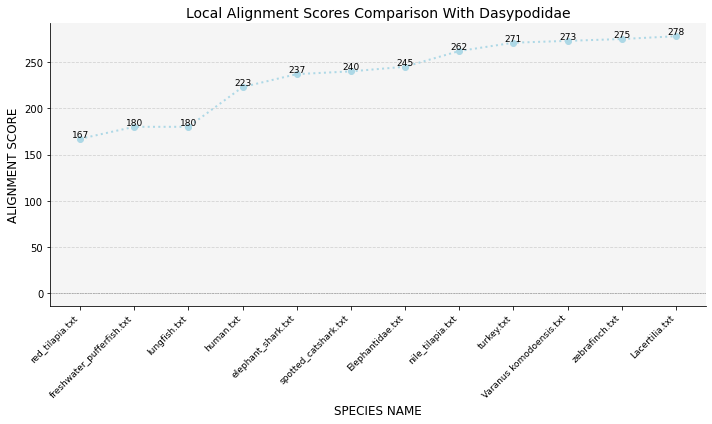

In [14]:
import matplotlib.pyplot as plt

alignment_scores = {
    "Elephantidae.txt": 245, "elephant_shark.txt": 237, "freshwater_pufferfish.txt": 180,
    "human.txt": 223, "Lacertilia.txt": 278, "lungfish.txt": 180, "nile_tilapia.txt": 262,
    "red_tilapia.txt": 167, "spotted_catshark.txt": 240, "turkey.txt": 271,
    "Varanus komodoensis.txt": 273, "zebrafinch.txt": 275
}

sorted_scores = sorted(alignment_scores.items(), key=lambda x: x[1])

files = [item[0] for item in sorted_scores]
alignment_values = [item[1] for item in sorted_scores]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(files, alignment_values, marker='o', linestyle=':', color='lightblue', linewidth=2)

# Customizing the plot
plt.xlabel("SPECIES NAME", fontsize=12)
plt.ylabel("ALIGNMENT SCORE", fontsize=12)
plt.title("Local Alignment Scores Comparison With Dasypodidae", fontsize=14)

# Tilt x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right', fontsize=9)

# Adjusting the grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding a background color to the plot
plt.gca().set_facecolor('#f5f5f5')

# Adding data labels
for x, y in zip(files, alignment_values):
    plt.text(x, y, str(y), ha='center', va='bottom', color='black', fontsize=9)

# Adding a subtle horizontal line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Removing top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adding padding to the bottom to accommodate x-axis labels
plt.gcf().subplots_adjust(bottom=0.2)

plt.tight_layout()

plt.show()


In [15]:
def extract_chicken_comparisons(file_path):
    keyword = "lungfish.txt"
    chicken_comparisons = []

    with open(file_path, "r") as file:
        lines = file.readlines()
        for i in range(len(lines)):
            if keyword in lines[i]:
                chicken_comparison = lines[i].strip() + " " + lines[i+1].strip()
                chicken_comparisons.append(chicken_comparison)

    return chicken_comparisons

file_path = "C:\\Users\\bnand\\Desktop\\LOCAL ALIGNMENT.txt"
chicken_comparisons = extract_chicken_comparisons(file_path)

# Print the extracted comparisons with chicken.txt and the alignment score
for comparison in chicken_comparisons:
    print(comparison)

Comparing chicken.txt and lungfish.txt Alignment Score: 341
Comparing chimpanzee.txt and lungfish.txt Alignment Score: 325
Comparing coelacant.txt and lungfish.txt Alignment Score: 334
Comparing Dasypodidae.txt and lungfish.txt Alignment Score: 180
Comparing Elephantidae.txt and lungfish.txt Alignment Score: 337
Comparing elephant_shark.txt and lungfish.txt Alignment Score: 344
Comparing freshwater_pufferfish.txt and lungfish.txt Alignment Score: 327
Comparing human.txt and lungfish.txt Alignment Score: 326
Comparing Lacertilia.txt and lungfish.txt Alignment Score: 344
Comparing lungfish.txt and nile_tilapia.txt Alignment Score: 306
Comparing lungfish.txt and red_tilapia.txt Alignment Score: 319
Comparing lungfish.txt and spotted_catshark.txt Alignment Score: 343
Comparing lungfish.txt and turkey.txt Alignment Score: 341
Comparing lungfish.txt and Varanus komodoensis.txt Alignment Score: 361
Comparing lungfish.txt and zebrafinch.txt Alignment Score: 342
Comparing lungfish.txt and zebra

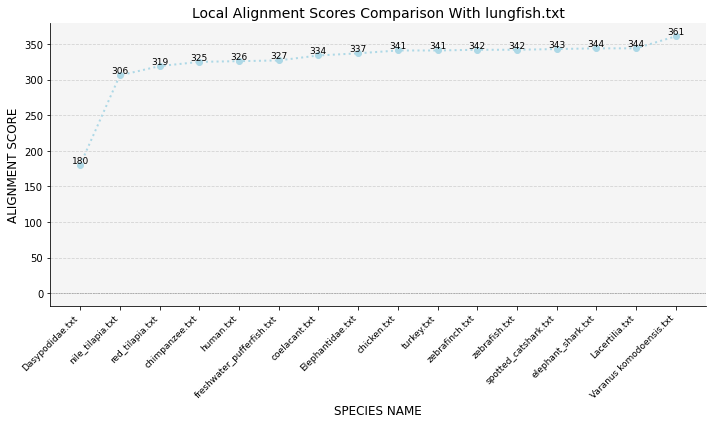

In [16]:
import matplotlib.pyplot as plt

alignment_scores = {
    "chicken.txt": 341, "chimpanzee.txt": 325, "coelacant.txt": 334, "Dasypodidae.txt": 180,
    "Elephantidae.txt": 337, "elephant_shark.txt": 344, "freshwater_pufferfish.txt": 327,
    "human.txt": 326, "Lacertilia.txt": 344, "nile_tilapia.txt": 306, "red_tilapia.txt": 319,
    "spotted_catshark.txt": 343, "turkey.txt": 341, "Varanus komodoensis.txt": 361,
    "zebrafinch.txt": 342, "zebrafish.txt": 342
}

sorted_scores = sorted(alignment_scores.items(), key=lambda x: x[1])

files = [item[0] for item in sorted_scores]
alignment_values = [item[1] for item in sorted_scores]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(files, alignment_values, marker='o', linestyle=':', color='lightblue', linewidth=2)

# Customizing the plot
plt.xlabel("SPECIES NAME", fontsize=12)
plt.ylabel("ALIGNMENT SCORE", fontsize=12)
plt.title("Local Alignment Scores Comparison With lungfish.txt", fontsize=14)

# Tilt x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right', fontsize=9)

# Adjusting the grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding a background color to the plot
plt.gca().set_facecolor('#f5f5f5')

# Adding data labels
for x, y in zip(files, alignment_values):
    plt.text(x, y, str(y), ha='center', va='bottom', color='black', fontsize=9)

# Adding a subtle horizontal line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Removing top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adding padding to the bottom to accommodate x-axis labels
plt.gcf().subplots_adjust(bottom=0.2)

plt.tight_layout()

plt.show()


In [17]:
def extract_chicken_comparisons(file_path):
    keyword = "red_tilapia.txt"
    chicken_comparisons = []

    with open(file_path, "r") as file:
        lines = file.readlines()
        for i in range(len(lines)):
            if keyword in lines[i]:
                chicken_comparison = lines[i].strip() + " " + lines[i+1].strip()
                chicken_comparisons.append(chicken_comparison)

    return chicken_comparisons

file_path = "C:\\Users\\bnand\\Desktop\\LOCAL ALIGNMENT.txt"
chicken_comparisons = extract_chicken_comparisons(file_path)

# Print the extracted comparisons with chicken.txt and the alignment score
for comparison in chicken_comparisons:
    print(comparison)

Comparing chicken.txt and red_tilapia.txt Alignment Score: 422
Comparing chimpanzee.txt and red_tilapia.txt Alignment Score: 425
Comparing coelacant.txt and red_tilapia.txt Alignment Score: 426
Comparing Dasypodidae.txt and red_tilapia.txt Alignment Score: 167
Comparing Elephantidae.txt and red_tilapia.txt Alignment Score: 453
Comparing elephant_shark.txt and red_tilapia.txt Alignment Score: 1028
Comparing freshwater_pufferfish.txt and red_tilapia.txt Alignment Score: 501
Comparing human.txt and red_tilapia.txt Alignment Score: 435
Comparing Lacertilia.txt and red_tilapia.txt Alignment Score: 441
Comparing lungfish.txt and red_tilapia.txt Alignment Score: 319
Comparing nile_tilapia.txt and red_tilapia.txt Alignment Score: 394
Comparing red_tilapia.txt and spotted_catshark.txt Alignment Score: 492
Comparing red_tilapia.txt and turkey.txt Alignment Score: 422
Comparing red_tilapia.txt and Varanus komodoensis.txt Alignment Score: 458
Comparing red_tilapia.txt and zebrafinch.txt Alignment 

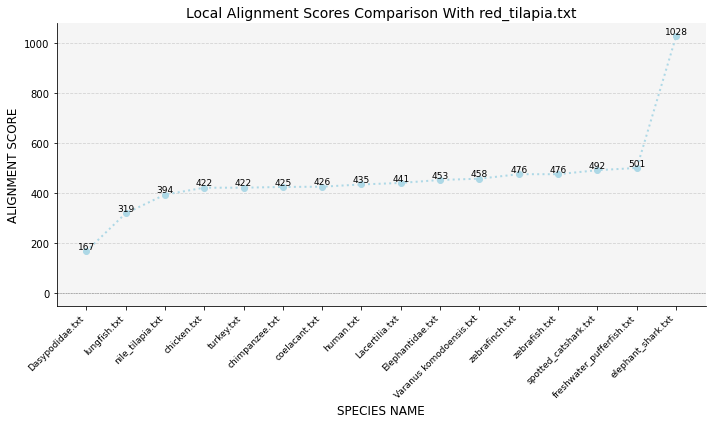

In [18]:
import matplotlib.pyplot as plt

alignment_scores = {
    "chicken.txt": 422, "chimpanzee.txt": 425, "coelacant.txt": 426, "Dasypodidae.txt": 167,
    "Elephantidae.txt": 453, "elephant_shark.txt": 1028, "freshwater_pufferfish.txt": 501,
    "human.txt": 435, "Lacertilia.txt": 441, "lungfish.txt": 319, "nile_tilapia.txt": 394,
    "spotted_catshark.txt": 492, "turkey.txt": 422, "Varanus komodoensis.txt": 458,
    "zebrafinch.txt": 476, "zebrafish.txt": 476
}

sorted_scores = sorted(alignment_scores.items(), key=lambda x: x[1])

files = [item[0] for item in sorted_scores]
alignment_values = [item[1] for item in sorted_scores]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(files, alignment_values, marker='o', linestyle=':', color='lightblue', linewidth=2)

# Customizing the plot
plt.xlabel("SPECIES NAME", fontsize=12)
plt.ylabel("ALIGNMENT SCORE", fontsize=12)
plt.title("Local Alignment Scores Comparison With red_tilapia.txt", fontsize=14)

# Tilt x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right', fontsize=9)

# Adjusting the grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding a background color to the plot
plt.gca().set_facecolor('#f5f5f5')

# Adding data labels
for x, y in zip(files, alignment_values):
    plt.text(x, y, str(y), ha='center', va='bottom', color='black', fontsize=9)

# Adding a subtle horizontal line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Removing top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adding padding to the bottom to accommodate x-axis labels
plt.gcf().subplots_adjust(bottom=0.2)

plt.tight_layout()

plt.show()


In [19]:
def extract_chicken_comparisons(file_path):
    keyword = "elephant_shark.txt"
    chicken_comparisons = []

    with open(file_path, "r") as file:
        lines = file.readlines()
        for i in range(len(lines)):
            if keyword in lines[i]:
                chicken_comparison = lines[i].strip() + " " + lines[i+1].strip()
                chicken_comparisons.append(chicken_comparison)

    return chicken_comparisons

file_path = "C:\\Users\\bnand\\Desktop\\LOCAL ALIGNMENT.txt"
chicken_comparisons = extract_chicken_comparisons(file_path)

# Print the extracted comparisons with chicken.txt and the alignment score
for comparison in chicken_comparisons:
    print(comparison)

Comparing chicken.txt and elephant_shark.txt Alignment Score: 486
Comparing chimpanzee.txt and elephant_shark.txt Alignment Score: 368
Comparing coelacant.txt and elephant_shark.txt Alignment Score: 516
Comparing Dasypodidae.txt and elephant_shark.txt Alignment Score: 237
Comparing Elephantidae.txt and elephant_shark.txt Alignment Score: 467
Comparing elephant_shark.txt and freshwater_pufferfish.txt Alignment Score: 464
Comparing elephant_shark.txt and human.txt Alignment Score: 379
Comparing elephant_shark.txt and Lacertilia.txt Alignment Score: 487
Comparing elephant_shark.txt and lungfish.txt Alignment Score: 344
Comparing elephant_shark.txt and nile_tilapia.txt Alignment Score: 416
Comparing elephant_shark.txt and red_tilapia.txt Alignment Score: 1028
Comparing elephant_shark.txt and spotted_catshark.txt Alignment Score: 558
Comparing elephant_shark.txt and turkey.txt Alignment Score: 486
Comparing elephant_shark.txt and Varanus komodoensis.txt Alignment Score: 494
Comparing elepha

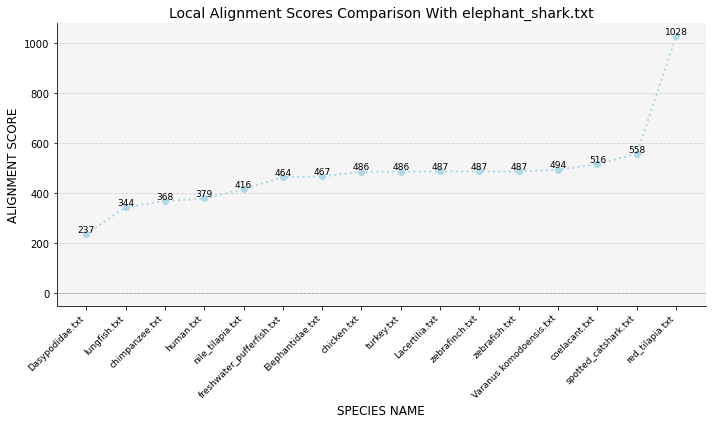

In [20]:
import matplotlib.pyplot as plt

alignment_scores = {
    "chicken.txt": 486, "chimpanzee.txt": 368, "coelacant.txt": 516, "Dasypodidae.txt": 237,
    "Elephantidae.txt": 467, "freshwater_pufferfish.txt": 464, "human.txt": 379,
    "Lacertilia.txt": 487, "lungfish.txt": 344, "nile_tilapia.txt": 416, "red_tilapia.txt": 1028,
    "spotted_catshark.txt": 558, "turkey.txt": 486, "Varanus komodoensis.txt": 494,
    "zebrafinch.txt": 487, "zebrafish.txt": 487
}

sorted_scores = sorted(alignment_scores.items(), key=lambda x: x[1])

files = [item[0] for item in sorted_scores]
alignment_values = [item[1] for item in sorted_scores]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(files, alignment_values, marker='o', linestyle=':', color='lightblue', linewidth=2)

# Customizing the plot
plt.xlabel("SPECIES NAME", fontsize=12)
plt.ylabel("ALIGNMENT SCORE", fontsize=12)
plt.title("Local Alignment Scores Comparison With elephant_shark.txt", fontsize=14)

# Tilt x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right', fontsize=9)

# Adjusting the grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding a background color to the plot
plt.gca().set_facecolor('#f5f5f5')

# Adding data labels
for x, y in zip(files, alignment_values):
    plt.text(x, y, str(y), ha='center', va='bottom', color='black', fontsize=9)

# Adding a subtle horizontal line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Removing top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adding padding to the bottom to accommodate x-axis labels
plt.gcf().subplots_adjust(bottom=0.2)

plt.tight_layout()

plt.show()


In [21]:
def extract_chicken_comparisons(file_path):
    keyword = "freshwater_pufferfish.txt"
    chicken_comparisons = []

    with open(file_path, "r") as file:
        lines = file.readlines()
        for i in range(len(lines)):
            if keyword in lines[i]:
                chicken_comparison = lines[i].strip() + " " + lines[i+1].strip()
                chicken_comparisons.append(chicken_comparison)

    return chicken_comparisons

file_path = "C:\\Users\\bnand\\Desktop\\LOCAL ALIGNMENT.txt"
chicken_comparisons = extract_chicken_comparisons(file_path)

# Print the extracted comparisons with chicken.txt and the alignment score
for comparison in chicken_comparisons:
    print(comparison)

Comparing chicken.txt and freshwater_pufferfish.txt Alignment Score: 515
Comparing chimpanzee.txt and freshwater_pufferfish.txt Alignment Score: 503
Comparing coelacant.txt and freshwater_pufferfish.txt Alignment Score: 491
Comparing Dasypodidae.txt and freshwater_pufferfish.txt Alignment Score: 180
Comparing Elephantidae.txt and freshwater_pufferfish.txt Alignment Score: 517
Comparing elephant_shark.txt and freshwater_pufferfish.txt Alignment Score: 464
Comparing freshwater_pufferfish.txt and human.txt Alignment Score: 488
Comparing freshwater_pufferfish.txt and Lacertilia.txt Alignment Score: 525
Comparing freshwater_pufferfish.txt and lungfish.txt Alignment Score: 327
Comparing freshwater_pufferfish.txt and nile_tilapia.txt Alignment Score: 435
Comparing freshwater_pufferfish.txt and red_tilapia.txt Alignment Score: 501
Comparing freshwater_pufferfish.txt and spotted_catshark.txt Alignment Score: 556
Comparing freshwater_pufferfish.txt and turkey.txt Alignment Score: 515
Comparing f

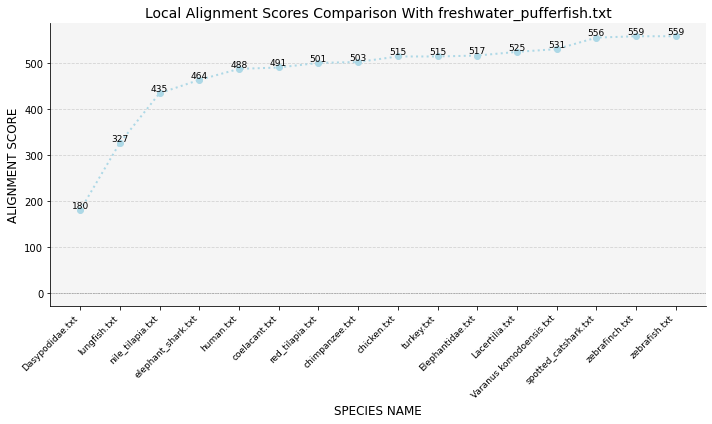

In [22]:
import matplotlib.pyplot as plt

alignment_scores = {
    "chicken.txt": 515, "chimpanzee.txt": 503, "coelacant.txt": 491, "Dasypodidae.txt": 180,
    "Elephantidae.txt": 517, "elephant_shark.txt": 464, "human.txt": 488,
    "Lacertilia.txt": 525, "lungfish.txt": 327, "nile_tilapia.txt": 435, "red_tilapia.txt": 501,
    "spotted_catshark.txt": 556, "turkey.txt": 515, "Varanus komodoensis.txt": 531,
    "zebrafinch.txt": 559, "zebrafish.txt": 559
}

sorted_scores = sorted(alignment_scores.items(), key=lambda x: x[1])

files = [item[0] for item in sorted_scores]
alignment_values = [item[1] for item in sorted_scores]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(files, alignment_values, marker='o', linestyle=':', color='lightblue', linewidth=2)

# Customizing the plot
plt.xlabel("SPECIES NAME", fontsize=12)
plt.ylabel("ALIGNMENT SCORE", fontsize=12)
plt.title("Local Alignment Scores Comparison With freshwater_pufferfish.txt", fontsize=14)

# Tilt x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right', fontsize=9)

# Adjusting the grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding a background color to the plot
plt.gca().set_facecolor('#f5f5f5')

# Adding data labels
for x, y in zip(files, alignment_values):
    plt.text(x, y, str(y), ha='center', va='bottom', color='black', fontsize=9)

# Adding a subtle horizontal line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Removing top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adding padding to the bottom to accommodate x-axis labels
plt.gcf().subplots_adjust(bottom=0.2)

plt.tight_layout()

plt.show()


In [23]:
def extract_chicken_comparisons(file_path):
    keyword = "nile_tilapia.txt"
    chicken_comparisons = []

    with open(file_path, "r") as file:
        lines = file.readlines()
        for i in range(len(lines)):
            if keyword in lines[i]:
                chicken_comparison = lines[i].strip() + " " + lines[i+1].strip()
                chicken_comparisons.append(chicken_comparison)

    return chicken_comparisons

file_path = "C:\\Users\\bnand\\Desktop\\LOCAL ALIGNMENT.txt"
chicken_comparisons = extract_chicken_comparisons(file_path)

# Print the extracted comparisons with chicken.txt and the alignment score
for comparison in chicken_comparisons:
    print(comparison)

Comparing chicken.txt and nile_tilapia.txt Alignment Score: 753
Comparing chimpanzee.txt and nile_tilapia.txt Alignment Score: 630
Comparing coelacant.txt and nile_tilapia.txt Alignment Score: 754
Comparing Dasypodidae.txt and nile_tilapia.txt Alignment Score: 262
Comparing Elephantidae.txt and nile_tilapia.txt Alignment Score: 702
Comparing elephant_shark.txt and nile_tilapia.txt Alignment Score: 416
Comparing freshwater_pufferfish.txt and nile_tilapia.txt Alignment Score: 435
Comparing human.txt and nile_tilapia.txt Alignment Score: 631
Comparing Lacertilia.txt and nile_tilapia.txt Alignment Score: 729
Comparing lungfish.txt and nile_tilapia.txt Alignment Score: 306
Comparing nile_tilapia.txt and red_tilapia.txt Alignment Score: 394
Comparing nile_tilapia.txt and spotted_catshark.txt Alignment Score: 595
Comparing nile_tilapia.txt and turkey.txt Alignment Score: 753
Comparing nile_tilapia.txt and Varanus komodoensis.txt Alignment Score: 723
Comparing nile_tilapia.txt and zebrafinch.t

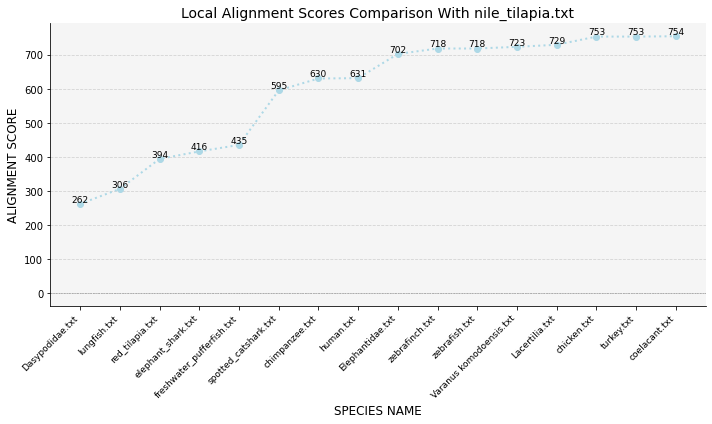

In [24]:
import matplotlib.pyplot as plt

alignment_scores = {
    "chicken.txt": 753, "chimpanzee.txt": 630, "coelacant.txt": 754, "Dasypodidae.txt": 262,
    "Elephantidae.txt": 702, "elephant_shark.txt": 416, "freshwater_pufferfish.txt": 435,
    "human.txt": 631, "Lacertilia.txt": 729, "lungfish.txt": 306, "red_tilapia.txt": 394,
    "spotted_catshark.txt": 595, "turkey.txt": 753, "Varanus komodoensis.txt": 723,
    "zebrafinch.txt": 718, "zebrafish.txt": 718
}

sorted_scores = sorted(alignment_scores.items(), key=lambda x: x[1])

files = [item[0] for item in sorted_scores]
alignment_values = [item[1] for item in sorted_scores]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(files, alignment_values, marker='o', linestyle=':', color='lightblue', linewidth=2)

# Customizing the plot
plt.xlabel("SPECIES NAME", fontsize=12)
plt.ylabel("ALIGNMENT SCORE", fontsize=12)
plt.title("Local Alignment Scores Comparison With nile_tilapia.txt", fontsize=14)

# Tilt x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right', fontsize=9)

# Adjusting the grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding a background color to the plot
plt.gca().set_facecolor('#f5f5f5')

# Adding data labels
for x, y in zip(files, alignment_values):
    plt.text(x, y, str(y), ha='center', va='bottom', color='black', fontsize=9)

# Adding a subtle horizontal line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Removing top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adding padding to the bottom to accommodate x-axis labels
plt.gcf().subplots_adjust(bottom=0.2)

plt.tight_layout()

plt.show()


In [25]:
def extract_chicken_comparisons(file_path):
    keyword = "spotted_catshark.txt"
    chicken_comparisons = []

    with open(file_path, "r") as file:
        lines = file.readlines()
        for i in range(len(lines)):
            if keyword in lines[i]:
                chicken_comparison = lines[i].strip() + " " + lines[i+1].strip()
                chicken_comparisons.append(chicken_comparison)

    return chicken_comparisons

file_path = "C:\\Users\\bnand\\Desktop\\LOCAL ALIGNMENT.txt"
chicken_comparisons = extract_chicken_comparisons(file_path)

# Print the extracted comparisons with chicken.txt and the alignment score
for comparison in chicken_comparisons:
    print(comparison)

Comparing chicken.txt and spotted_catshark.txt Alignment Score: 832
Comparing chimpanzee.txt and spotted_catshark.txt Alignment Score: 626
Comparing coelacant.txt and spotted_catshark.txt Alignment Score: 844
Comparing Dasypodidae.txt and spotted_catshark.txt Alignment Score: 240
Comparing Elephantidae.txt and spotted_catshark.txt Alignment Score: 822
Comparing elephant_shark.txt and spotted_catshark.txt Alignment Score: 558
Comparing freshwater_pufferfish.txt and spotted_catshark.txt Alignment Score: 556
Comparing human.txt and spotted_catshark.txt Alignment Score: 651
Comparing Lacertilia.txt and spotted_catshark.txt Alignment Score: 822
Comparing lungfish.txt and spotted_catshark.txt Alignment Score: 343
Comparing nile_tilapia.txt and spotted_catshark.txt Alignment Score: 595
Comparing red_tilapia.txt and spotted_catshark.txt Alignment Score: 492
Comparing spotted_catshark.txt and turkey.txt Alignment Score: 832
Comparing spotted_catshark.txt and Varanus komodoensis.txt Alignment Sc

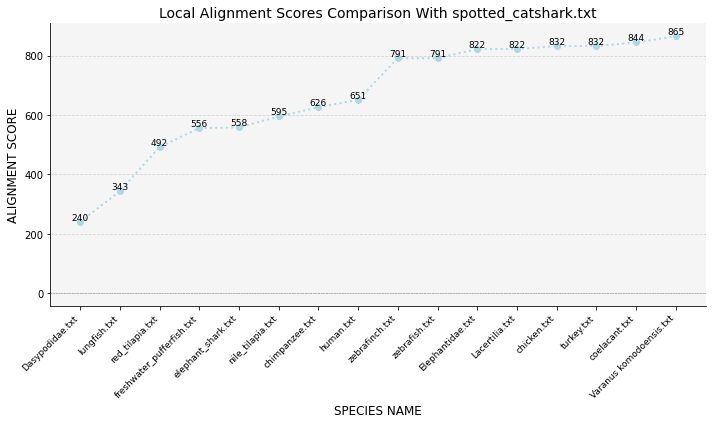

In [26]:
import matplotlib.pyplot as plt

alignment_scores = {
    "chicken.txt": 832, "chimpanzee.txt": 626, "coelacant.txt": 844, "Dasypodidae.txt": 240,
    "Elephantidae.txt": 822, "elephant_shark.txt": 558, "freshwater_pufferfish.txt": 556,
    "human.txt": 651, "Lacertilia.txt": 822, "lungfish.txt": 343, "nile_tilapia.txt": 595,
    "red_tilapia.txt": 492, "turkey.txt": 832, "Varanus komodoensis.txt": 865,
    "zebrafinch.txt": 791, "zebrafish.txt": 791
}

sorted_scores = sorted(alignment_scores.items(), key=lambda x: x[1])

files = [item[0] for item in sorted_scores]
alignment_values = [item[1] for item in sorted_scores]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(files, alignment_values, marker='o', linestyle=':', color='lightblue', linewidth=2)

# Customizing the plot
plt.xlabel("SPECIES NAME", fontsize=12)
plt.ylabel("ALIGNMENT SCORE", fontsize=12)
plt.title("Local Alignment Scores Comparison With spotted_catshark.txt", fontsize=14)

# Tilt x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right', fontsize=9)

# Adjusting the grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding a background color to the plot
plt.gca().set_facecolor('#f5f5f5')

# Adding data labels
for x, y in zip(files, alignment_values):
    plt.text(x, y, str(y), ha='center', va='bottom', color='black', fontsize=9)

# Adding a subtle horizontal line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Removing top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adding padding to the bottom to accommodate x-axis labels
plt.gcf().subplots_adjust(bottom=0.2)

plt.tight_layout()

plt.show()


In [28]:
def extract_chicken_comparisons(file_path):
    keyword = "zebrafinch.txt"
    chicken_comparisons = []

    with open(file_path, "r") as file:
        lines = file.readlines()
        for i in range(len(lines)):
            if keyword in lines[i]:
                chicken_comparison = lines[i].strip() + " " + lines[i+1].strip()
                chicken_comparisons.append(chicken_comparison)

    return chicken_comparisons

file_path = "C:\\Users\\bnand\\Desktop\\LOCAL ALIGNMENT.txt"
chicken_comparisons = extract_chicken_comparisons(file_path)

# Print the extracted comparisons with chicken.txt and the alignment score
for comparison in chicken_comparisons:
    print(comparison)

Comparing chicken.txt and zebrafinch.txt Alignment Score: 1383
Comparing chimpanzee.txt and zebrafinch.txt Alignment Score: 1074
Comparing coelacant.txt and zebrafinch.txt Alignment Score: 1247
Comparing Dasypodidae.txt and zebrafinch.txt Alignment Score: 275
Comparing Elephantidae.txt and zebrafinch.txt Alignment Score: 1346
Comparing elephant_shark.txt and zebrafinch.txt Alignment Score: 487
Comparing freshwater_pufferfish.txt and zebrafinch.txt Alignment Score: 559
Comparing human.txt and zebrafinch.txt Alignment Score: 1226
Comparing Lacertilia.txt and zebrafinch.txt Alignment Score: 1302
Comparing lungfish.txt and zebrafinch.txt Alignment Score: 342
Comparing nile_tilapia.txt and zebrafinch.txt Alignment Score: 718
Comparing red_tilapia.txt and zebrafinch.txt Alignment Score: 476
Comparing spotted_catshark.txt and zebrafinch.txt Alignment Score: 791
Comparing turkey.txt and zebrafinch.txt Alignment Score: 1383
Comparing Varanus komodoensis.txt and zebrafinch.txt Alignment Score: 1

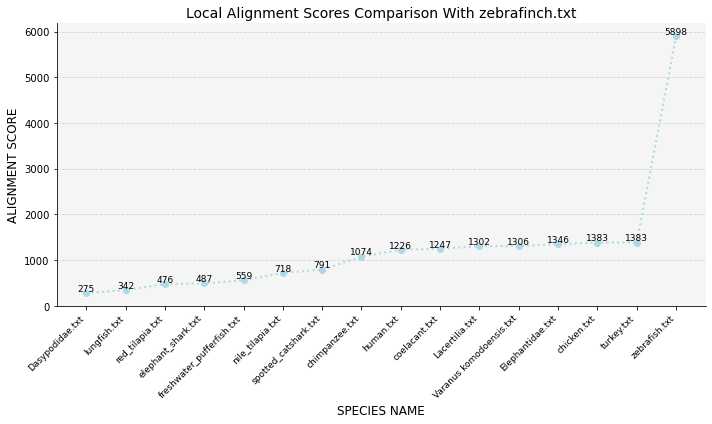

In [29]:
import matplotlib.pyplot as plt

alignment_scores = {
    "chicken.txt": 1383, "chimpanzee.txt": 1074, "coelacant.txt": 1247, "Dasypodidae.txt": 275,
    "Elephantidae.txt": 1346, "elephant_shark.txt": 487, "freshwater_pufferfish.txt": 559,
    "human.txt": 1226, "Lacertilia.txt": 1302, "lungfish.txt": 342, "nile_tilapia.txt": 718,
    "red_tilapia.txt": 476, "spotted_catshark.txt": 791, "turkey.txt": 1383,
    "Varanus komodoensis.txt": 1306, "zebrafish.txt": 5898
}

sorted_scores = sorted(alignment_scores.items(), key=lambda x: x[1])

files = [item[0] for item in sorted_scores]
alignment_values = [item[1] for item in sorted_scores]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(files, alignment_values, marker='o', linestyle=':', color='lightblue', linewidth=2)

# Customizing the plot
plt.xlabel("SPECIES NAME", fontsize=12)
plt.ylabel("ALIGNMENT SCORE", fontsize=12)
plt.title("Local Alignment Scores Comparison With zebrafinch.txt", fontsize=14)

# Tilt x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right', fontsize=9)

# Adjusting the grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding a background color to the plot
plt.gca().set_facecolor('#f5f5f5')

# Adding data labels
for x, y in zip(files, alignment_values):
    plt.text(x, y, str(y), ha='center', va='bottom', color='black', fontsize=9)

# Adding a subtle horizontal line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Removing top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adding padding to the bottom to accommodate x-axis labels
plt.gcf().subplots_adjust(bottom=0.2)

plt.tight_layout()

plt.show()


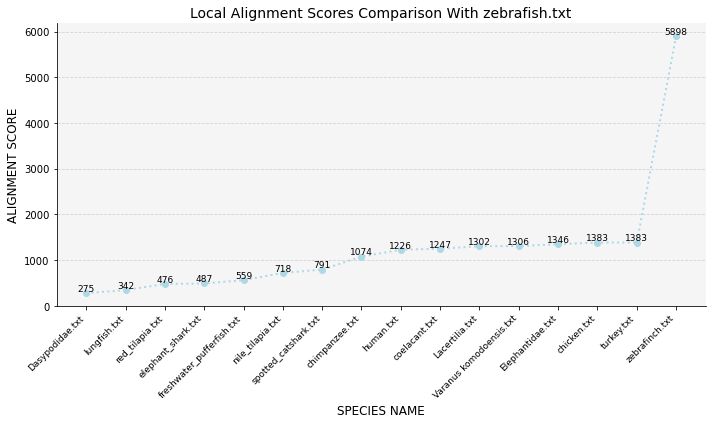

In [32]:
import matplotlib.pyplot as plt

alignment_scores = {
    "chicken.txt": 1383, "chimpanzee.txt": 1074, "coelacant.txt": 1247, "Dasypodidae.txt": 275,
    "Elephantidae.txt": 1346, "elephant_shark.txt": 487, "freshwater_pufferfish.txt": 559,
    "human.txt": 1226, "Lacertilia.txt": 1302, "lungfish.txt": 342, "nile_tilapia.txt": 718,
    "red_tilapia.txt": 476, "spotted_catshark.txt": 791, "turkey.txt": 1383,
    "Varanus komodoensis.txt": 1306, "zebrafinch.txt": 5898, "zebrafish.txt": 5898
}

# Remove zebrafish.txt from the alignment_scores dictionary
alignment_scores.pop("zebrafish.txt")

sorted_scores = sorted(alignment_scores.items(), key=lambda x: x[1])

files = [item[0] for item in sorted_scores]
alignment_values = [item[1] for item in sorted_scores]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(files, alignment_values, marker='o', linestyle=':', color='lightblue', linewidth=2)

# Customizing the plot
plt.xlabel("SPECIES NAME", fontsize=12)
plt.ylabel("ALIGNMENT SCORE", fontsize=12)
plt.title("Local Alignment Scores Comparison With zebrafish.txt", fontsize=14)

# Tilt x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right', fontsize=9)

# Adjusting the grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding a background color to the plot
plt.gca().set_facecolor('#f5f5f5')

# Adding data labels
for x, y in zip(files, alignment_values):
    plt.text(x, y, str(y), ha='center', va='bottom', color='black', fontsize=9)

# Adding a subtle horizontal line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Removing top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adding padding to the bottom to accommodate x-axis labels
plt.gcf().subplots_adjust(bottom=0.2)

plt.tight_layout()

plt.show()


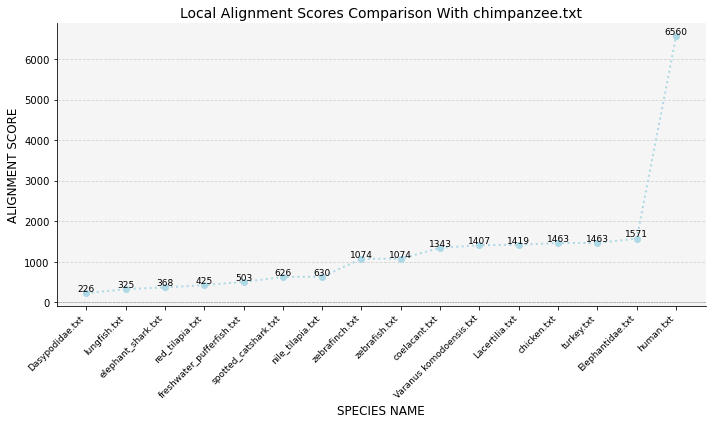

In [35]:
import matplotlib.pyplot as plt

alignment_scores = {
    "chicken.txt": 1463, "coelacant.txt": 1343, "Dasypodidae.txt": 226, "Elephantidae.txt": 1571,
    "elephant_shark.txt": 368, "freshwater_pufferfish.txt": 503, "human.txt": 6560,
    "Lacertilia.txt": 1419, "lungfish.txt": 325, "nile_tilapia.txt": 630, "red_tilapia.txt": 425,
    "spotted_catshark.txt": 626, "turkey.txt": 1463, "Varanus komodoensis.txt": 1407,
    "zebrafinch.txt": 1074, "zebrafish.txt": 1074
}

# Check if "chimpanzee.txt" is present in the dictionary
if "chimpanzee.txt" in alignment_scores:
    # Remove chimpanzee.txt from the alignment_scores dictionary
    alignment_scores.pop("chimpanzee.txt")

sorted_scores = sorted(alignment_scores.items(), key=lambda x: x[1])

files = [item[0] for item in sorted_scores]
alignment_values = [item[1] for item in sorted_scores]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(files, alignment_values, marker='o', linestyle=':', color='lightblue', linewidth=2)

# Customizing the plot
plt.xlabel("SPECIES NAME", fontsize=12)
plt.ylabel("ALIGNMENT SCORE", fontsize=12)
plt.title("Local Alignment Scores Comparison With chimpanzee.txt", fontsize=14)

# Tilt x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right', fontsize=9)

# Adjusting the grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding a background color to the plot
plt.gca().set_facecolor('#f5f5f5')

# Adding data labels
for x, y in zip(files, alignment_values):
    plt.text(x, y, str(y), ha='center', va='bottom', color='black', fontsize=9)

# Adding a subtle horizontal line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Removing top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adding padding to the bottom to accommodate x-axis labels
plt.gcf().subplots_adjust(bottom=0.2)

plt.tight_layout()

plt.show()


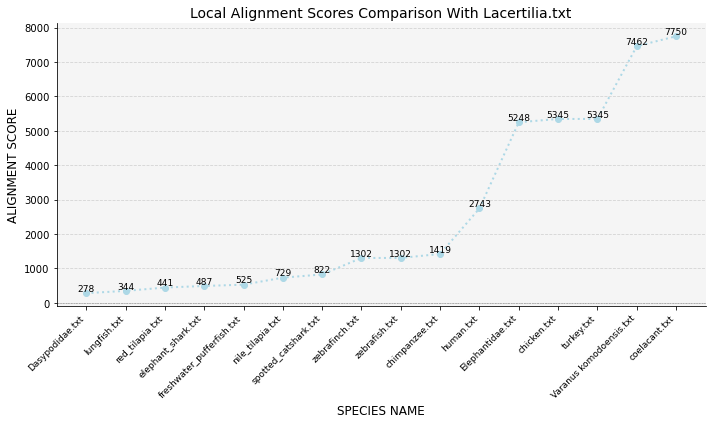

In [36]:
import matplotlib.pyplot as plt

alignment_scores = {
    "chicken.txt": 5345, "chimpanzee.txt": 1419, "coelacant.txt": 7750, "Dasypodidae.txt": 278,
    "Elephantidae.txt": 5248, "elephant_shark.txt": 487, "freshwater_pufferfish.txt": 525,
    "human.txt": 2743, "Lacertilia.txt": 5345, "lungfish.txt": 344, "nile_tilapia.txt": 729,
    "red_tilapia.txt": 441, "spotted_catshark.txt": 822, "turkey.txt": 5345,
    "Varanus komodoensis.txt": 7462, "zebrafinch.txt": 1302, "zebrafish.txt": 1302
}

# Remove "Lacertilia.txt" from the alignment_scores dictionary
alignment_scores.pop("Lacertilia.txt")

sorted_scores = sorted(alignment_scores.items(), key=lambda x: x[1])

files = [item[0] for item in sorted_scores]
alignment_values = [item[1] for item in sorted_scores]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(files, alignment_values, marker='o', linestyle=':', color='lightblue', linewidth=2)

# Customizing the plot
plt.xlabel("SPECIES NAME", fontsize=12)
plt.ylabel("ALIGNMENT SCORE", fontsize=12)
plt.title("Local Alignment Scores Comparison With Lacertilia.txt", fontsize=14)

# Tilt x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right', fontsize=9)

# Adjusting the grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding a background color to the plot
plt.gca().set_facecolor('#f5f5f5')

# Adding data labels
for x, y in zip(files, alignment_values):
    plt.text(x, y, str(y), ha='center', va='bottom', color='black', fontsize=9)

# Adding a subtle horizontal line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Removing top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adding padding to the bottom to accommodate x-axis labels
plt.gcf().subplots_adjust(bottom=0.2)

plt.tight_layout()

plt.show()


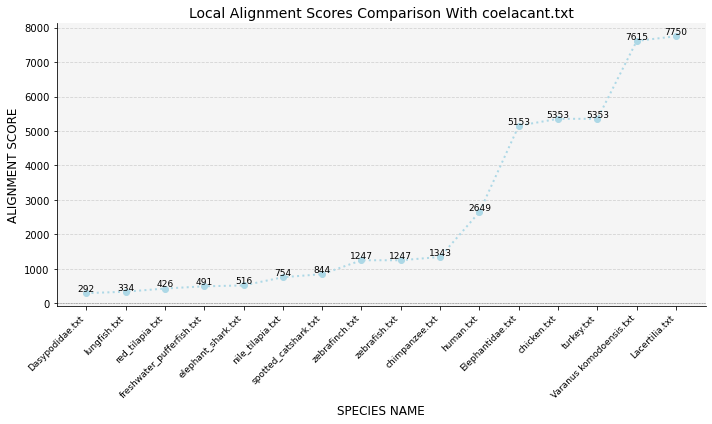

In [37]:
import matplotlib.pyplot as plt

alignment_scores = {
    "chicken.txt": 5353, "chimpanzee.txt": 1343, "coelacant.txt": 5353, "Dasypodidae.txt": 292,
    "Elephantidae.txt": 5153, "elephant_shark.txt": 516, "freshwater_pufferfish.txt": 491,
    "human.txt": 2649, "Lacertilia.txt": 7750, "lungfish.txt": 334, "nile_tilapia.txt": 754,
    "red_tilapia.txt": 426, "spotted_catshark.txt": 844, "turkey.txt": 5353,
    "Varanus komodoensis.txt": 7615, "zebrafinch.txt": 1247, "zebrafish.txt": 1247
}

# Remove "coelacant.txt" from the alignment_scores dictionary
alignment_scores.pop("coelacant.txt")

sorted_scores = sorted(alignment_scores.items(), key=lambda x: x[1])

files = [item[0] for item in sorted_scores]
alignment_values = [item[1] for item in sorted_scores]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(files, alignment_values, marker='o', linestyle=':', color='lightblue', linewidth=2)

# Customizing the plot
plt.xlabel("SPECIES NAME", fontsize=12)
plt.ylabel("ALIGNMENT SCORE", fontsize=12)
plt.title("Local Alignment Scores Comparison With coelacant.txt", fontsize=14)

# Tilt x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right', fontsize=9)

# Adjusting the grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding a background color to the plot
plt.gca().set_facecolor('#f5f5f5')

# Adding data labels
for x, y in zip(files, alignment_values):
    plt.text(x, y, str(y), ha='center', va='bottom', color='black', fontsize=9)

# Adding a subtle horizontal line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Removing top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adding padding to the bottom to accommodate x-axis labels
plt.gcf().subplots_adjust(bottom=0.2)

plt.tight_layout()

plt.show()


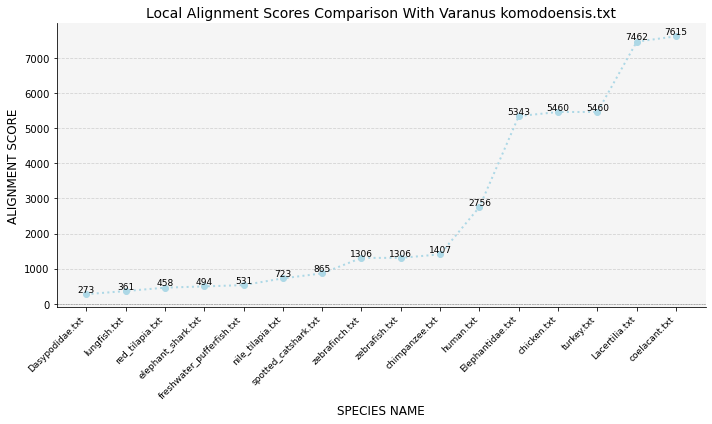

In [38]:
import matplotlib.pyplot as plt

alignment_scores = {
    "chicken.txt": 5460, "chimpanzee.txt": 1407, "coelacant.txt": 7615, "Dasypodidae.txt": 273,
    "Elephantidae.txt": 5343, "elephant_shark.txt": 494, "freshwater_pufferfish.txt": 531,
    "human.txt": 2756, "Lacertilia.txt": 7462, "lungfish.txt": 361, "nile_tilapia.txt": 723,
    "red_tilapia.txt": 458, "spotted_catshark.txt": 865, "turkey.txt": 5460,
    "Varanus komodoensis.txt": 1306, "zebrafinch.txt": 1306, "zebrafish.txt": 1306
}

# Remove "Varanus komodoensis.txt" from the alignment_scores dictionary
alignment_scores.pop("Varanus komodoensis.txt")

sorted_scores = sorted(alignment_scores.items(), key=lambda x: x[1])

files = [item[0] for item in sorted_scores]
alignment_values = [item[1] for item in sorted_scores]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(files, alignment_values, marker='o', linestyle=':', color='lightblue', linewidth=2)

# Customizing the plot
plt.xlabel("SPECIES NAME", fontsize=12)
plt.ylabel("ALIGNMENT SCORE", fontsize=12)
plt.title("Local Alignment Scores Comparison With Varanus komodoensis.txt", fontsize=14)

# Tilt x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right', fontsize=9)

# Adjusting the grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding a background color to the plot
plt.gca().set_facecolor('#f5f5f5')

# Adding data labels
for x, y in zip(files, alignment_values):
    plt.text(x, y, str(y), ha='center', va='bottom', color='black', fontsize=9)

# Adding a subtle horizontal line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Removing top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adding padding to the bottom to accommodate x-axis labels
plt.gcf().subplots_adjust(bottom=0.2)

plt.tight_layout()

plt.show()


In [40]:
import matplotlib.pyplot as plt

alignment_scores = {
    "chicken.txt": 24026, "chimpanzee.txt": 1463, "coelacant.txt": 5353, "Dasypodidae.txt": 271,
    "Elephantidae.txt": 5064, "elephant_shark.txt": 486, "freshwater_pufferfish.txt": 515,
    "human.txt": 2778, "Lacertilia.txt": 5345, "lungfish.txt": 341, "nile_tilapia.txt": 753,
    "red_tilapia.txt": 422, "spotted_catshark.txt": 832, "Varanus komodoensis.txt": 5460,
    "zebrafinch.txt": 1383, "zebrafish.txt": 1383
}

# Correcting the key "Bephantidae.txt" to "Elephantidae.txt"
alignment_scores["Elephantidae.txt"] = alignment_scores.pop("Bephantidae.txt")

# Check if "turkey.txt" exists in the dictionary before removing it
if "turkey.txt" in alignment_scores:
    alignment_scores.pop("turkey.txt")

sorted_scores = sorted(alignment_scores.items(), key=lambda x: x[1])

files = [item[0] for item in sorted_scores]
alignment_values = [item[1] for item in sorted_scores]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(files, alignment_values, marker='o', linestyle=':', color='lightblue', linewidth=2)

# Customizing the plot
plt.xlabel("SPECIES NAME", fontsize=12)
plt.ylabel("ALIGNMENT SCORE", fontsize=12)
plt.title("Local Alignment Scores Comparison With turkey.txt", fontsize=14)

# Tilt x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right', fontsize=9)

# Adjusting the grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding a background color to the plot
plt.gca().set_facecolor('#f5f5f5')

# Adding data labels
for x, y in zip(files, alignment_values):
    plt.text(x, y, str(y), ha='center', va='bottom', color='black', fontsize=9)

# Adding a subtle horizontal line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Removing top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adding padding to the bottom to accommodate x-axis labels
plt.gcf().subplots_adjust(bottom=0.2)

plt.tight_layout()

plt.show()


KeyError: 'Bephantidae.txt'

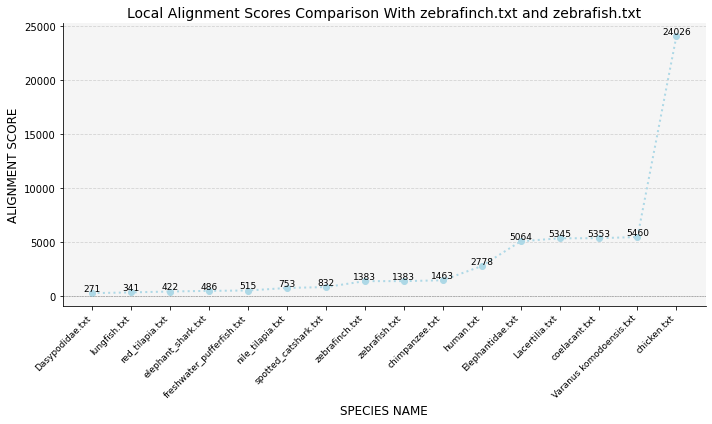

In [41]:
import matplotlib.pyplot as plt

alignment_scores = {
    "chicken.txt": 24026, "chimpanzee.txt": 1463, "coelacant.txt": 5353, "Dasypodidae.txt": 271,
    "Elephantidae.txt": 5064, "elephant_shark.txt": 486, "freshwater_pufferfish.txt": 515,
    "human.txt": 2778, "Lacertilia.txt": 5345, "lungfish.txt": 341, "nile_tilapia.txt": 753,
    "red_tilapia.txt": 422, "spotted_catshark.txt": 832, "Varanus komodoensis.txt": 5460,
    "zebrafinch.txt": 1383, "zebrafish.txt": 1383
}

# Check if "turkey.txt" exists in the dictionary before removing it
if "turkey.txt" in alignment_scores:
    alignment_scores.pop("turkey.txt")

sorted_scores = sorted(alignment_scores.items(), key=lambda x: x[1])

files = [item[0] for item in sorted_scores]
alignment_values = [item[1] for item in sorted_scores]

# Plotting
plt.figure(figsize=(10, 6))

plt.plot(files, alignment_values, marker='o', linestyle=':', color='lightblue', linewidth=2)

# Customizing the plot
plt.xlabel("SPECIES NAME", fontsize=12)
plt.ylabel("ALIGNMENT SCORE", fontsize=12)
plt.title("Local Alignment Scores Comparison With zebrafinch.txt and zebrafish.txt", fontsize=14)

# Tilt x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right', fontsize=9)

# Adjusting the grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding a background color to the plot
plt.gca().set_facecolor('#f5f5f5')

# Adding data labels
for x, y in zip(files, alignment_values):
    plt.text(x, y, str(y), ha='center', va='bottom', color='black', fontsize=9)

# Adding a subtle horizontal line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Removing top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adding padding to the bottom to accommodate x-axis labels
plt.gcf().subplots_adjust(bottom=0.2)

plt.tight_layout()

plt.show()


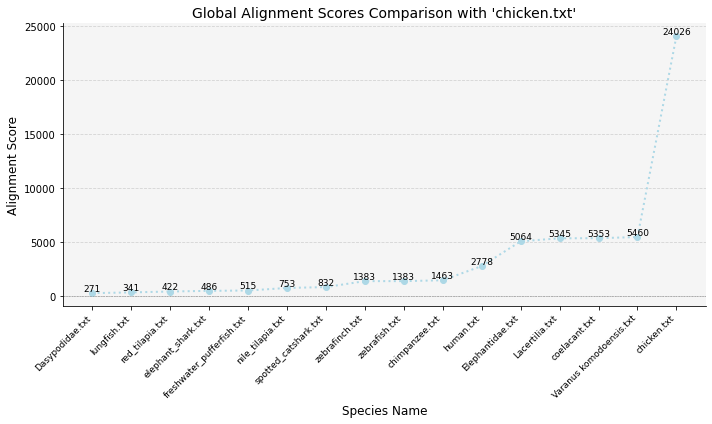

In [42]:
import matplotlib.pyplot as plt

# Sort alignment scores in increasing order
sorted_scores = sorted(alignment_scores.items(), key=lambda x: x[1])

files = [item[0] for item in sorted_scores]
alignment_values = [item[1] for item in sorted_scores]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(files, alignment_values, marker='o', linestyle=':', color='lightblue', linewidth=2)

# Customizing the plot
plt.xlabel("Species Name", fontsize=12)
plt.ylabel("Alignment Score", fontsize=12)
plt.title("Global Alignment Scores Comparison with 'chicken.txt'", fontsize=14)

# Tilt x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right', fontsize=9)

# Adjusting the grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding a background color to the plot
plt.gca().set_facecolor('#f5f5f5')

# Adding data labels
for x, y in zip(files, alignment_values):
    plt.text(x, y, str(y), ha='center', va='bottom', color='black', fontsize=9)

# Adding a subtle horizontal line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Removing top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


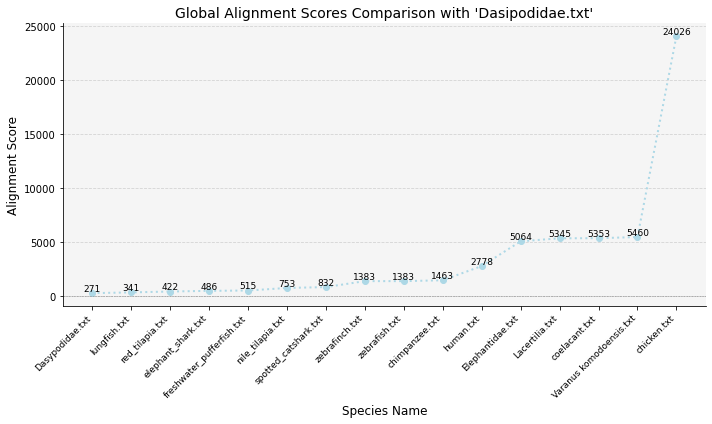

In [44]:
import matplotlib.pyplot as plt

# Sort alignment scores in increasing order
sorted_scores = sorted(alignment_scores.items(), key=lambda x: x[1])

files = [item[0] for item in sorted_scores]
alignment_values = [item[1] for item in sorted_scores]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(files, alignment_values, marker='o', linestyle=':', color='lightblue', linewidth=2)

# Customizing the plot
plt.xlabel("Species Name", fontsize=12)
plt.ylabel("Alignment Score", fontsize=12)
plt.title("Global Alignment Scores Comparison with 'Dasipodidae.txt'", fontsize=14)

# Tilt x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right', fontsize=9)

# Adjusting the grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding a background color to the plot
plt.gca().set_facecolor('#f5f5f5')

# Adding data labels
for x, y in zip(files, alignment_values):
    plt.text(x, y, str(y), ha='center', va='bottom', color='black', fontsize=9)

# Adding a subtle horizontal line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Removing top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


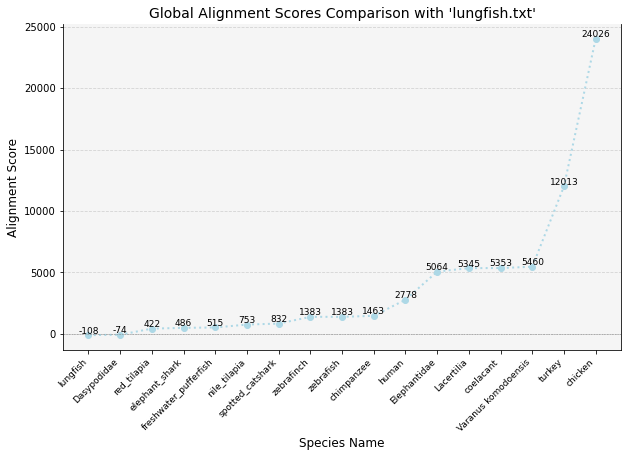

In [45]:
import matplotlib.pyplot as plt

alignment_scores = {
    "chicken.txt": 24026, "chimpanzee.txt": 1463, "coelacant.txt": 5353, "Dasypodidae.txt": -74,
    "Elephantidae.txt": 5064, "elephant_shark.txt": 486, "freshwater_pufferfish.txt": 515,
    "human.txt": 2778, "Lacertilia.txt": 5345, "lungfish.txt": -108, "nile_tilapia.txt": 753,
    "red_tilapia.txt": 422, "spotted_catshark.txt": 832, "turkey.txt": 12013,
    "Varanus komodoensis.txt": 5460, "zebrafinch.txt": 1383, "zebrafish.txt": 1383
}

# Sort alignment scores in increasing order
sorted_scores = sorted(alignment_scores.items(), key=lambda x: x[1])

files = [item[0] for item in sorted_scores]
alignment_values = [item[1] for item in sorted_scores]

# Extracting labels from file names without the ".txt" extension
labels = [file_name.split(".")[0] for file_name in files]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(labels, alignment_values, marker='o', linestyle=':', color='lightblue', linewidth=2)

# Customizing the plot
plt.xlabel("Species Name", fontsize=12)
plt.ylabel("Alignment Score", fontsize=12)
plt.title("Global Alignment Scores Comparison with 'lungfish.txt'", fontsize=14)

# Tilt x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right', fontsize=9)

# Adjusting the grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding a background color to the plot
plt.gca().set_facecolor('#f5f5f5')

# Adding data labels
for x, y in zip(labels, alignment_values):
    plt.text(x, y, str(y), ha='center', va='bottom', color='black', fontsize=9)

# Adding a subtle horizontal line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Removing top and right spines
plt.gca().spines['top'].set_visible(False)


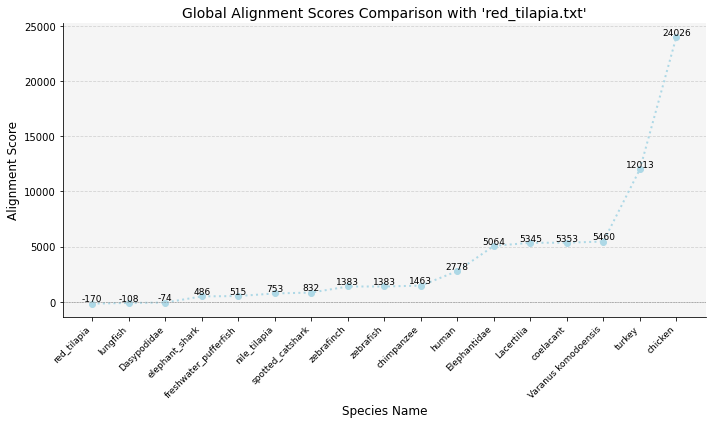

In [46]:
import matplotlib.pyplot as plt

alignment_scores = {
    "chicken.txt": 24026, "chimpanzee.txt": 1463, "coelacant.txt": 5353, "Dasypodidae.txt": -74,
    "Elephantidae.txt": 5064, "elephant_shark.txt": 486, "freshwater_pufferfish.txt": 515,
    "human.txt": 2778, "Lacertilia.txt": 5345, "lungfish.txt": -108, "nile_tilapia.txt": 753,
    "red_tilapia.txt": -170, "spotted_catshark.txt": 832, "turkey.txt": 12013,
    "Varanus komodoensis.txt": 5460, "zebrafinch.txt": 1383, "zebrafish.txt": 1383
}

# Sort alignment scores in increasing order
sorted_scores = sorted(alignment_scores.items(), key=lambda x: x[1])

files = [item[0] for item in sorted_scores]
alignment_values = [item[1] for item in sorted_scores]

# Extracting labels from file names without the ".txt" extension
labels = [file_name.split(".")[0] for file_name in files]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(labels, alignment_values, marker='o', linestyle=':', color='lightblue', linewidth=2)

# Customizing the plot
plt.xlabel("Species Name", fontsize=12)
plt.ylabel("Alignment Score", fontsize=12)
plt.title("Global Alignment Scores Comparison with 'red_tilapia.txt'", fontsize=14)

# Tilt x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right', fontsize=9)

# Adjusting the grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding a background color to the plot
plt.gca().set_facecolor('#f5f5f5')

# Adding data labels
for x, y in zip(labels, alignment_values):
    plt.text(x, y, str(y), ha='center', va='bottom', color='black', fontsize=9)

# Adding a subtle horizontal line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Removing top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


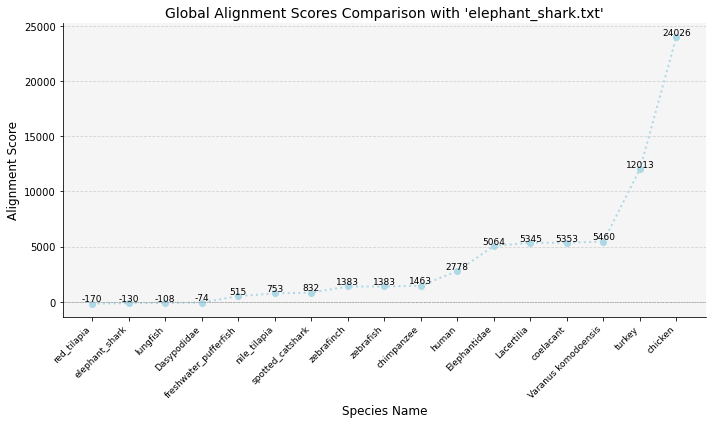

In [47]:
import matplotlib.pyplot as plt

alignment_scores = {
    "chicken.txt": 24026, "chimpanzee.txt": 1463, "coelacant.txt": 5353, "Dasypodidae.txt": -74,
    "Elephantidae.txt": 5064, "elephant_shark.txt": -130, "freshwater_pufferfish.txt": 515,
    "human.txt": 2778, "Lacertilia.txt": 5345, "lungfish.txt": -108, "nile_tilapia.txt": 753,
    "red_tilapia.txt": -170, "spotted_catshark.txt": 832, "turkey.txt": 12013,
    "Varanus komodoensis.txt": 5460, "zebrafinch.txt": 1383, "zebrafish.txt": 1383
}

# Sort alignment scores in increasing order
sorted_scores = sorted(alignment_scores.items(), key=lambda x: x[1])

files = [item[0] for item in sorted_scores]
alignment_values = [item[1] for item in sorted_scores]

# Extracting labels from file names without the ".txt" extension
labels = [file_name.split(".")[0] for file_name in files]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(labels, alignment_values, marker='o', linestyle=':', color='lightblue', linewidth=2)

# Customizing the plot
plt.xlabel("Species Name", fontsize=12)
plt.ylabel("Alignment Score", fontsize=12)
plt.title("Global Alignment Scores Comparison with 'elephant_shark.txt'", fontsize=14)

# Tilt x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right', fontsize=9)

# Adjusting the grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding a background color to the plot
plt.gca().set_facecolor('#f5f5f5')

# Adding data labels
for x, y in zip(labels, alignment_values):
    plt.text(x, y, str(y), ha='center', va='bottom', color='black', fontsize=9)

# Adding a subtle horizontal line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Removing top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


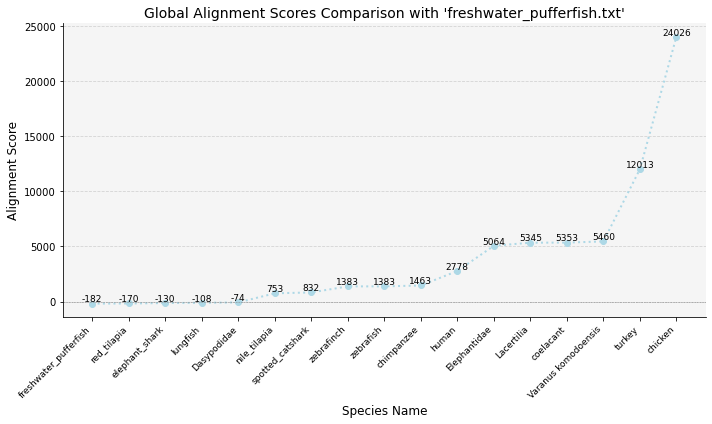

In [48]:
import matplotlib.pyplot as plt

alignment_scores = {
    "chicken.txt": 24026, "chimpanzee.txt": 1463, "coelacant.txt": 5353, "Dasypodidae.txt": -74,
    "Elephantidae.txt": 5064, "elephant_shark.txt": -130, "freshwater_pufferfish.txt": -182,
    "human.txt": 2778, "Lacertilia.txt": 5345, "lungfish.txt": -108, "nile_tilapia.txt": 753,
    "red_tilapia.txt": -170, "spotted_catshark.txt": 832, "turkey.txt": 12013,
    "Varanus komodoensis.txt": 5460, "zebrafinch.txt": 1383, "zebrafish.txt": 1383
}

# Sort alignment scores in increasing order
sorted_scores = sorted(alignment_scores.items(), key=lambda x: x[1])

files = [item[0] for item in sorted_scores]
alignment_values = [item[1] for item in sorted_scores]

# Extracting labels from file names without the ".txt" extension
labels = [file_name.split(".")[0] for file_name in files]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(labels, alignment_values, marker='o', linestyle=':', color='lightblue', linewidth=2)

# Customizing the plot
plt.xlabel("Species Name", fontsize=12)
plt.ylabel("Alignment Score", fontsize=12)
plt.title("Global Alignment Scores Comparison with 'freshwater_pufferfish.txt'", fontsize=14)

# Tilt x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right', fontsize=9)

# Adjusting the grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding a background color to the plot
plt.gca().set_facecolor('#f5f5f5')

# Adding data labels
for x, y in zip(labels, alignment_values):
    plt.text(x, y, str(y), ha='center', va='bottom', color='black', fontsize=9)

# Adding a subtle horizontal line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Removing top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


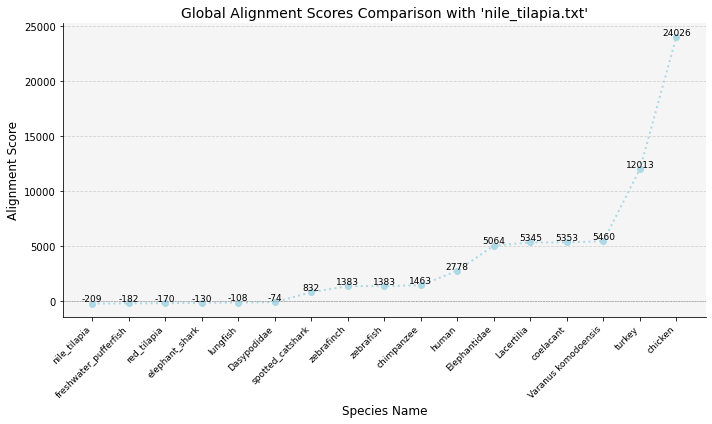

In [49]:
import matplotlib.pyplot as plt

alignment_scores = {
    "chicken.txt": 24026, "chimpanzee.txt": 1463, "coelacant.txt": 5353, "Dasypodidae.txt": -74,
    "Elephantidae.txt": 5064, "elephant_shark.txt": -130, "freshwater_pufferfish.txt": -182,
    "human.txt": 2778, "Lacertilia.txt": 5345, "lungfish.txt": -108, "nile_tilapia.txt": -209,
    "red_tilapia.txt": -170, "spotted_catshark.txt": 832, "turkey.txt": 12013,
    "Varanus komodoensis.txt": 5460, "zebrafinch.txt": 1383, "zebrafish.txt": 1383
}

# Sort alignment scores in increasing order
sorted_scores = sorted(alignment_scores.items(), key=lambda x: x[1])

files = [item[0] for item in sorted_scores]
alignment_values = [item[1] for item in sorted_scores]

# Extracting labels from file names without the ".txt" extension
labels = [file_name.split(".")[0] for file_name in files]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(labels, alignment_values, marker='o', linestyle=':', color='lightblue', linewidth=2)

# Customizing the plot
plt.xlabel("Species Name", fontsize=12)
plt.ylabel("Alignment Score", fontsize=12)
plt.title("Global Alignment Scores Comparison with 'nile_tilapia.txt'", fontsize=14)

# Tilt x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right', fontsize=9)

# Adjusting the grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding a background color to the plot
plt.gca().set_facecolor('#f5f5f5')

# Adding data labels
for x, y in zip(labels, alignment_values):
    plt.text(x, y, str(y), ha='center', va='bottom', color='black', fontsize=9)

# Adding a subtle horizontal line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Removing top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


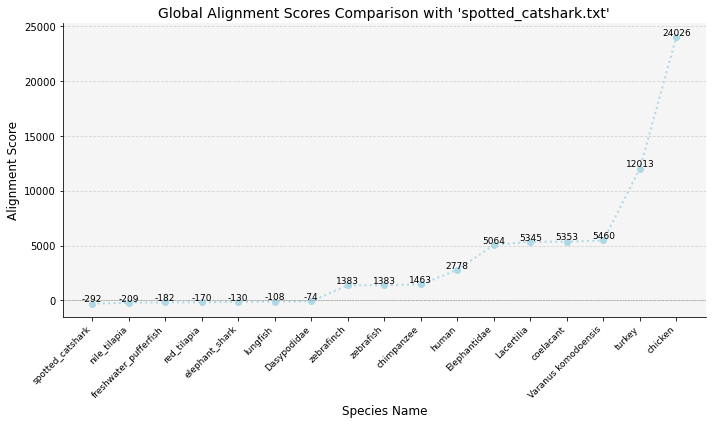

In [50]:
import matplotlib.pyplot as plt

alignment_scores = {
    "chicken.txt": 24026, "chimpanzee.txt": 1463, "coelacant.txt": 5353, "Dasypodidae.txt": -74,
    "Elephantidae.txt": 5064, "elephant_shark.txt": -130, "freshwater_pufferfish.txt": -182,
    "human.txt": 2778, "Lacertilia.txt": 5345, "lungfish.txt": -108, "nile_tilapia.txt": -209,
    "red_tilapia.txt": -170, "spotted_catshark.txt": -292, "turkey.txt": 12013,
    "Varanus komodoensis.txt": 5460, "zebrafinch.txt": 1383, "zebrafish.txt": 1383
}

# Sort alignment scores in increasing order
sorted_scores = sorted(alignment_scores.items(), key=lambda x: x[1])

files = [item[0] for item in sorted_scores]
alignment_values = [item[1] for item in sorted_scores]

# Extracting labels from file names without the ".txt" extension
labels = [file_name.split(".")[0] for file_name in files]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(labels, alignment_values, marker='o', linestyle=':', color='lightblue', linewidth=2)

# Customizing the plot
plt.xlabel("Species Name", fontsize=12)
plt.ylabel("Alignment Score", fontsize=12)
plt.title("Global Alignment Scores Comparison with 'spotted_catshark.txt'", fontsize=14)

# Tilt x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right', fontsize=9)

# Adjusting the grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding a background color to the plot
plt.gca().set_facecolor('#f5f5f5')

# Adding data labels
for x, y in zip(labels, alignment_values):
    plt.text(x, y, str(y), ha='center', va='bottom', color='black', fontsize=9)

# Adding a subtle horizontal line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Removing top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


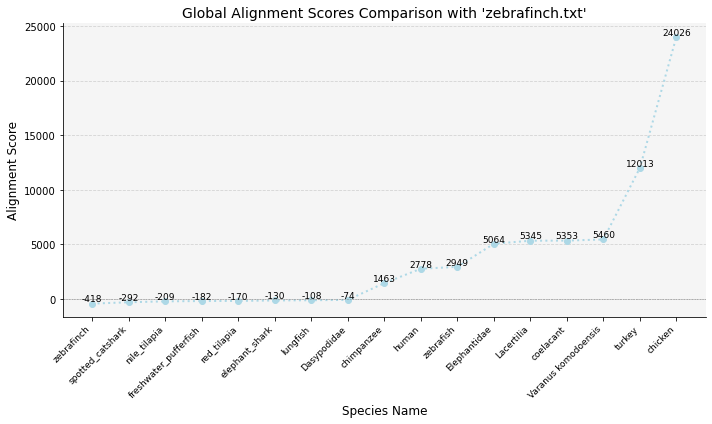

In [51]:
import matplotlib.pyplot as plt

alignment_scores = {
    "chicken.txt": 24026, "chimpanzee.txt": 1463, "coelacant.txt": 5353, "Dasypodidae.txt": -74,
    "Elephantidae.txt": 5064, "elephant_shark.txt": -130, "freshwater_pufferfish.txt": -182,
    "human.txt": 2778, "Lacertilia.txt": 5345, "lungfish.txt": -108, "nile_tilapia.txt": -209,
    "red_tilapia.txt": -170, "spotted_catshark.txt": -292, "turkey.txt": 12013,
    "Varanus komodoensis.txt": 5460, "zebrafinch.txt": -418, "zebrafish.txt": 2949
}

# Sort alignment scores in increasing order
sorted_scores = sorted(alignment_scores.items(), key=lambda x: x[1])

files = [item[0] for item in sorted_scores]
alignment_values = [item[1] for item in sorted_scores]

# Extracting labels from file names without the ".txt" extension
labels = [file_name.split(".")[0] for file_name in files]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(labels, alignment_values, marker='o', linestyle=':', color='lightblue', linewidth=2)

# Customizing the plot
plt.xlabel("Species Name", fontsize=12)
plt.ylabel("Alignment Score", fontsize=12)
plt.title("Global Alignment Scores Comparison with 'zebrafinch.txt'", fontsize=14)

# Tilt x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right', fontsize=9)

# Adjusting the grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding a background color to the plot
plt.gca().set_facecolor('#f5f5f5')

# Adding data labels
for x, y in zip(labels, alignment_values):
    plt.text(x, y, str(y), ha='center', va='bottom', color='black', fontsize=9)

# Adding a subtle horizontal line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Removing top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


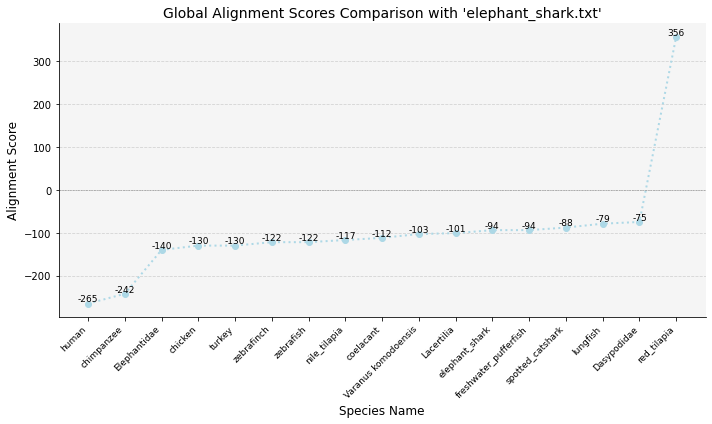

In [52]:
import matplotlib.pyplot as plt

alignment_scores = {
    "chicken.txt": -130, "chimpanzee.txt": -242, "coelacant.txt": -112, "Dasypodidae.txt": -75,
    "Elephantidae.txt": -140, "elephant_shark.txt": -94, "freshwater_pufferfish.txt": -94,
    "human.txt": -265, "Lacertilia.txt": -101, "lungfish.txt": -79, "nile_tilapia.txt": -117,
    "red_tilapia.txt": 356, "spotted_catshark.txt": -88, "turkey.txt": -130,
    "Varanus komodoensis.txt": -103, "zebrafinch.txt": -122, "zebrafish.txt": -122
}

# Sort alignment scores in increasing order
sorted_scores = sorted(alignment_scores.items(), key=lambda x: x[1])

files = [item[0] for item in sorted_scores]
alignment_values = [item[1] for item in sorted_scores]

# Extracting labels from file names without the ".txt" extension
labels = [file_name.split(".")[0] for file_name in files]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(labels, alignment_values, marker='o', linestyle=':', color='lightblue', linewidth=2)

# Customizing the plot
plt.xlabel("Species Name", fontsize=12)
plt.ylabel("Alignment Score", fontsize=12)
plt.title("Global Alignment Scores Comparison with 'elephant_shark.txt'", fontsize=14)

# Tilt x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right', fontsize=9)

# Adjusting the grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding a background color to the plot
plt.gca().set_facecolor('#f5f5f5')

# Adding data labels
for x, y in zip(labels, alignment_values):
    plt.text(x, y, str(y), ha='center', va='bottom', color='black', fontsize=9)

# Adding a subtle horizontal line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Removing top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


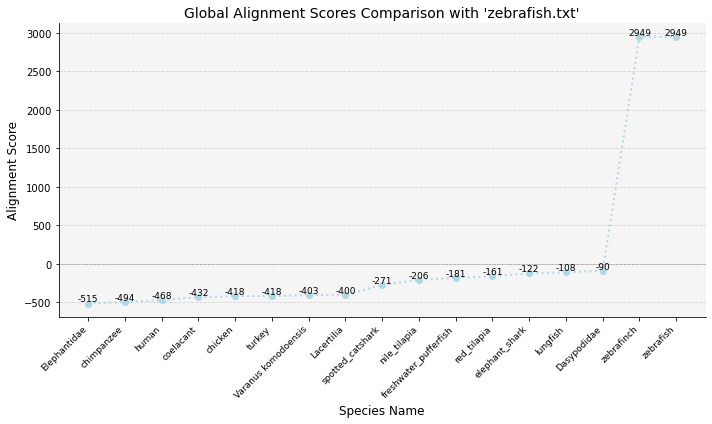

In [53]:
import matplotlib.pyplot as plt

alignment_scores = {
    "chicken.txt": -418, "chimpanzee.txt": -494, "coelacant.txt": -432, "Dasypodidae.txt": -90,
    "Elephantidae.txt": -515, "elephant_shark.txt": -122, "freshwater_pufferfish.txt": -181,
    "human.txt": -468, "Lacertilia.txt": -400, "lungfish.txt": -108, "nile_tilapia.txt": -206,
    "red_tilapia.txt": -161, "spotted_catshark.txt": -271, "turkey.txt": -418,
    "Varanus komodoensis.txt": -403, "zebrafinch.txt": 2949, "zebrafish.txt": 2949
}

# Sort alignment scores in increasing order
sorted_scores = sorted(alignment_scores.items(), key=lambda x: x[1])

files = [item[0] for item in sorted_scores]
alignment_values = [item[1] for item in sorted_scores]

# Extracting labels from file names without the ".txt" extension
labels = [file_name.split(".")[0] for file_name in files]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(labels, alignment_values, marker='o', linestyle=':', color='lightblue', linewidth=2)

# Customizing the plot
plt.xlabel("Species Name", fontsize=12)
plt.ylabel("Alignment Score", fontsize=12)
plt.title("Global Alignment Scores Comparison with 'zebrafish.txt'", fontsize=14)

# Tilt x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right', fontsize=9)

# Adjusting the grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding a background color to the plot
plt.gca().set_facecolor('#f5f5f5')

# Adding data labels
for x, y in zip(labels, alignment_values):
    plt.text(x, y, str(y), ha='center', va='bottom', color='black', fontsize=9)

# Adding a subtle horizontal line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Removing top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


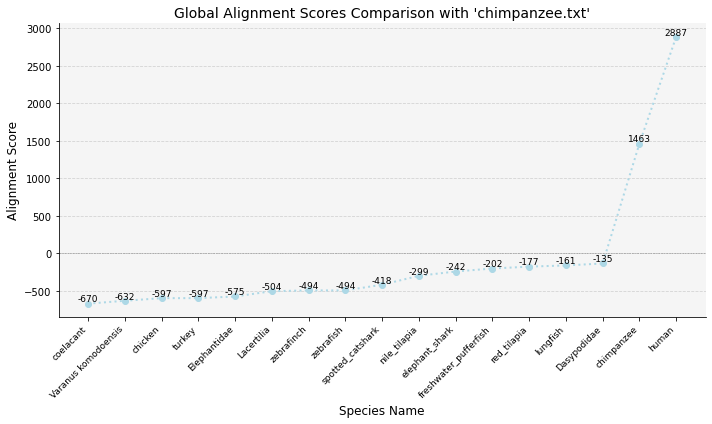

In [54]:
import matplotlib.pyplot as plt

alignment_scores = {
    "chicken.txt": -597, "chimpanzee.txt": 1463, "coelacant.txt": -670, "Dasypodidae.txt": -135,
    "Elephantidae.txt": -575, "elephant_shark.txt": -242, "freshwater_pufferfish.txt": -202,
    "human.txt": 2887, "Lacertilia.txt": -504, "lungfish.txt": -161, "nile_tilapia.txt": -299,
    "red_tilapia.txt": -177, "spotted_catshark.txt": -418, "turkey.txt": -597,
    "Varanus komodoensis.txt": -632, "zebrafinch.txt": -494, "zebrafish.txt": -494
}

# Sort alignment scores in increasing order
sorted_scores = sorted(alignment_scores.items(), key=lambda x: x[1])

files = [item[0] for item in sorted_scores]
alignment_values = [item[1] for item in sorted_scores]

# Extracting labels from file names without the ".txt" extension
labels = [file_name.split(".")[0] for file_name in files]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(labels, alignment_values, marker='o', linestyle=':', color='lightblue', linewidth=2)

# Customizing the plot
plt.xlabel("Species Name", fontsize=12)
plt.ylabel("Alignment Score", fontsize=12)
plt.title("Global Alignment Scores Comparison with 'chimpanzee.txt'", fontsize=14)

# Tilt x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right', fontsize=9)

# Adjusting the grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding a background color to the plot
plt.gca().set_facecolor('#f5f5f5')

# Adding data labels
for x, y in zip(labels, alignment_values):
    plt.text(x, y, str(y), ha='center', va='bottom', color='black', fontsize=9)

# Adding a subtle horizontal line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Removing top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


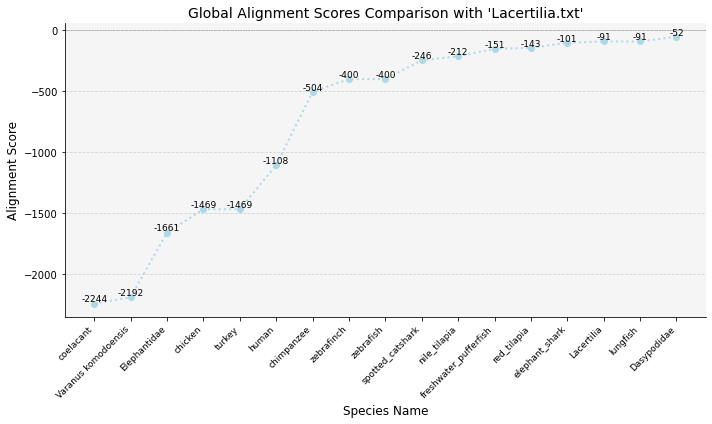

In [55]:
import matplotlib.pyplot as plt

alignment_scores = {
    "chicken.txt": -1469, "chimpanzee.txt": -504, "coelacant.txt": -2244, "Dasypodidae.txt": -52,
    "Elephantidae.txt": -1661, "elephant_shark.txt": -101, "freshwater_pufferfish.txt": -151,
    "human.txt": -1108, "Lacertilia.txt": -91, "lungfish.txt": -91, "nile_tilapia.txt": -212,
    "red_tilapia.txt": -143, "spotted_catshark.txt": -246, "turkey.txt": -1469,
    "Varanus komodoensis.txt": -2192, "zebrafinch.txt": -400, "zebrafish.txt": -400
}

# Sort alignment scores in increasing order
sorted_scores = sorted(alignment_scores.items(), key=lambda x: x[1])

files = [item[0] for item in sorted_scores]
alignment_values = [item[1] for item in sorted_scores]

# Extracting labels from file names without the ".txt" extension
labels = [file_name.split(".")[0] for file_name in files]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(labels, alignment_values, marker='o', linestyle=':', color='lightblue', linewidth=2)

# Customizing the plot
plt.xlabel("Species Name", fontsize=12)
plt.ylabel("Alignment Score", fontsize=12)
plt.title("Global Alignment Scores Comparison with 'Lacertilia.txt'", fontsize=14)

# Tilt x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right', fontsize=9)

# Adjusting the grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding a background color to the plot
plt.gca().set_facecolor('#f5f5f5')

# Adding data labels
for x, y in zip(labels, alignment_values):
    plt.text(x, y, str(y), ha='center', va='bottom', color='black', fontsize=9)

# Adding a subtle horizontal line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Removing top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


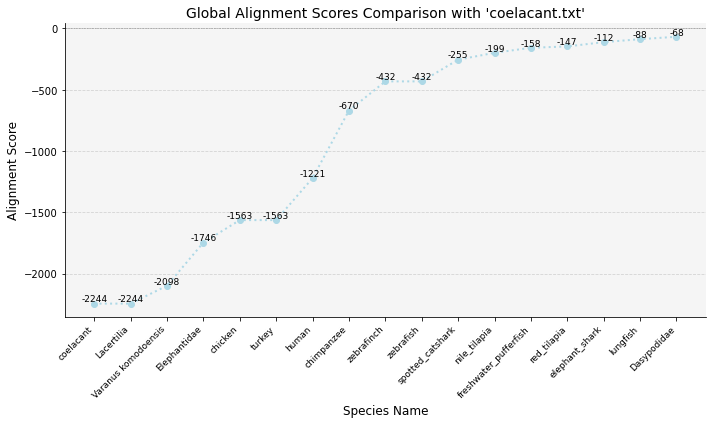

In [57]:
import matplotlib.pyplot as plt

alignment_scores = {
    "chicken.txt": -1563, "chimpanzee.txt": -670, "coelacant.txt": -2244, "Dasypodidae.txt": -68,
    "Elephantidae.txt": -1746, "elephant_shark.txt": -112, "freshwater_pufferfish.txt": -158,
    "human.txt": -1221, "Lacertilia.txt": -2244, "lungfish.txt": -88, "nile_tilapia.txt": -199,
    "red_tilapia.txt": -147, "spotted_catshark.txt": -255, "turkey.txt": -1563,
    "Varanus komodoensis.txt": -2098, "zebrafinch.txt": -432, "zebrafish.txt": -432
}

# Sort alignment scores in increasing order
sorted_scores = sorted(alignment_scores.items(), key=lambda x: x[1])

files = [item[0] for item in sorted_scores]
alignment_values = [item[1] for item in sorted_scores]

# Extracting labels from file names without the ".txt" extension
labels = [file_name.split(".")[0] for file_name in files]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(labels, alignment_values, marker='o', linestyle=':', color='lightblue', linewidth=2)

# Customizing the plot
plt.xlabel("Species Name", fontsize=12)
plt.ylabel("Alignment Score", fontsize=12)
plt.title("Global Alignment Scores Comparison with 'coelacant.txt'", fontsize=14)

# Tilt x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right', fontsize=9)

# Adjusting the grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding a background color to the plot
plt.gca().set_facecolor('#f5f5f5')

# Adding data labels
for x, y in zip(labels, alignment_values):
    plt.text(x, y, str(y), ha='center', va='bottom', color='black', fontsize=9)

# Adding a subtle horizontal line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Removing top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


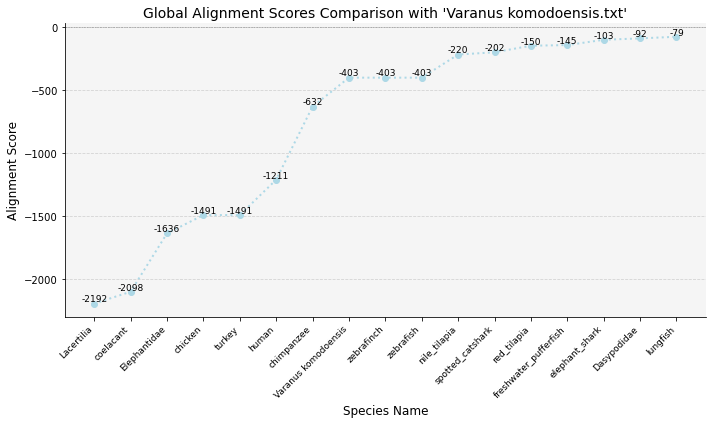

In [58]:
import matplotlib.pyplot as plt

alignment_scores = {
    "chicken.txt": -1491, "chimpanzee.txt": -632, "coelacant.txt": -2098, "Dasypodidae.txt": -92,
    "Elephantidae.txt": -1636, "elephant_shark.txt": -103, "freshwater_pufferfish.txt": -145,
    "human.txt": -1211, "Lacertilia.txt": -2192, "lungfish.txt": -79, "nile_tilapia.txt": -220,
    "red_tilapia.txt": -150, "spotted_catshark.txt": -202, "turkey.txt": -1491,
    "Varanus komodoensis.txt": -403, "zebrafinch.txt": -403, "zebrafish.txt": -403
}

# Sort alignment scores in increasing order
sorted_scores = sorted(alignment_scores.items(), key=lambda x: x[1])

files = [item[0] for item in sorted_scores]
alignment_values = [item[1] for item in sorted_scores]

# Extracting labels from file names without the ".txt" extension
labels = [file_name.split(".")[0] for file_name in files]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(labels, alignment_values, marker='o', linestyle=':', color='lightblue', linewidth=2)

# Customizing the plot
plt.xlabel("Species Name", fontsize=12)
plt.ylabel("Alignment Score", fontsize=12)
plt.title("Global Alignment Scores Comparison with 'Varanus komodoensis.txt'", fontsize=14)

# Tilt x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right', fontsize=9)

# Adjusting the grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding a background color to the plot
plt.gca().set_facecolor('#f5f5f5')

# Adding data labels
for x, y in zip(labels, alignment_values):
    plt.text(x, y, str(y), ha='center', va='bottom', color='black', fontsize=9)

# Adding a subtle horizontal line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Removing top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


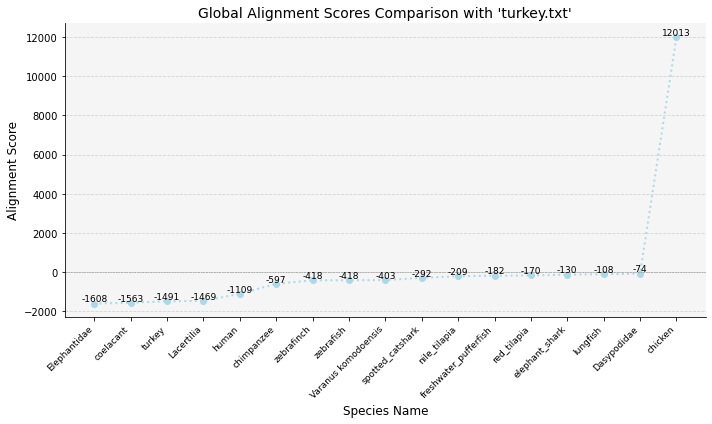

In [59]:
import matplotlib.pyplot as plt

alignment_scores = {
    "chicken.txt": 12013, "chimpanzee.txt": -597, "coelacant.txt": -1563, "Dasypodidae.txt": -74,
    "Elephantidae.txt": -1608, "elephant_shark.txt": -130, "freshwater_pufferfish.txt": -182,
    "human.txt": -1109, "Lacertilia.txt": -1469, "lungfish.txt": -108, "nile_tilapia.txt": -209,
    "red_tilapia.txt": -170, "spotted_catshark.txt": -292, "turkey.txt": -1491,
    "Varanus komodoensis.txt": -403, "zebrafinch.txt": -418, "zebrafish.txt": -418
}

# Sort alignment scores in increasing order
sorted_scores = sorted(alignment_scores.items(), key=lambda x: x[1])

files = [item[0] for item in sorted_scores]
alignment_values = [item[1] for item in sorted_scores]

# Extracting labels from file names without the ".txt" extension
labels = [file_name.split(".")[0] for file_name in files]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(labels, alignment_values, marker='o', linestyle=':', color='lightblue', linewidth=2)

# Customizing the plot
plt.xlabel("Species Name", fontsize=12)
plt.ylabel("Alignment Score", fontsize=12)
plt.title("Global Alignment Scores Comparison with 'turkey.txt'", fontsize=14)

# Tilt x-axis labels by 45 degrees
plt.xticks(rotation=45, ha='right', fontsize=9)

# Adjusting the grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Adding a background color to the plot
plt.gca().set_facecolor('#f5f5f5')

# Adding data labels
for x, y in zip(labels, alignment_values):
    plt.text(x, y, str(y), ha='center', va='bottom', color='black', fontsize=9)

# Adding a subtle horizontal line at y=0 for reference
plt.axhline(0, color='gray', linestyle='--', linewidth=0.5)

# Removing top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()
plt.show()
